## Employee Attrition
### Fictional dataset on HR Employee attrition and performance


The key to success in any organization is attracting and retaining top talent. As an HR analyst one of the key task is to determine which factors keep employees at the company and which prompt others to leave. Given in the data is a set of data points on the employees who are either currently working within the company or have resigned. The objective is to identify and improve these factors to prevent loss of good people.

### Importiing necessary libraries

In [1]:
# Preprocessing
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

import os
import scipy as stats

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Importing dataset

In [2]:
#load dataset

df=pd.read_csv(r"C:\Users\HP\Desktop\Rutika\ML\employee_attrition_train.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0     50.0        No      Travel_Rarely     1126.0  Research & Development   
1     36.0        No      Travel_Rarely      216.0  Research & Development   
2     21.0       Yes      Travel_Rarely      337.0                   Sales   
3     50.0        No  Travel_Frequently     1246.0         Human Resources   
4     52.0        No      Travel_Rarely      994.0  Research & Development   
...    ...       ...                ...        ...                     ...   
1024   NaN        No      Travel_Rarely      750.0  Research & Development   
1025  41.0        No      Travel_Rarely      447.0  Research & Development   
1026  22.0       Yes  Travel_Frequently     1256.0  Research & Development   
1027  29.0        No      Travel_Rarely     1378.0  Research & Development   
1028  50.0        No      Travel_Rarely      264.0                   Sales   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                  1.0          2        Medical              1   
1                  6.0          2        Medical              1   
2                  7.0          1      Marketing              1   
3                  NaN          3        Medical              1   
4                  7.0          4  Life Sciences              1   
...                ...        ...            ...            ...   
1024              28.0          3  Life Sciences              1   
1025               NaN          3  Life Sciences              1   
1026               NaN          4  Life Sciences              1   
1027              13.0          2          Other              1   
1028               9.0          3      Marketing              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                997  ...                         3            80   
1                178  ...                         4            80   
2               1780  ...                         2            80   
3                644  ...                         3            80   
4               1118  ...                         4            80   
...              ...  ...                       ...           ...   
1024            1596  ...                         4            80   
1025            1814  ...                         1            80   
1026            1203  ...                         2            80   
1027            2053  ...                         1            80   
1028            1591  ...                         3            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    1                 32                      1   
1                    2                  7                      0   
2                    0                  1                      3   
3                    1                 32                      2   
4                    0                 18                      4   
...                ...                ...                    ...   
1024                 2                 10                      3   
1025                 0                 11                      3   
1026                 1                  1                      5   
1027                 1                 10                      2   
1028                 1                 27                      2   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  2               5                  4   
1                  3               3                  2   
2                  3               1                  0   
3                  3              32                  5   
4                  3               8                  6   
...              ...             ...                ...   
1024               2              10                  9   
1025               1               3                  2   
1026               3               0                  0   
1027               3         

Here we can notice first 5 and last 5 rows of the dataset. The above dataset shows that there are 1029 rows and 35 columns present. The dataset contains both dependent and independent variables. In this dataset "Attrition" is the target variableand the remaining feature columns that determine or help in predicting the HR Employee attrition and performance. Since the target variable is consists of 2 classes which is categorical in nature which makes this to be a "Classification Problem". Also the dataset contains both categorical and numerical types of data.

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0  50.0        No      Travel_Rarely     1126.0  Research & Development   
1  36.0        No      Travel_Rarely      216.0  Research & Development   
2  21.0       Yes      Travel_Rarely      337.0                   Sales   
3  50.0        No  Travel_Frequently     1246.0         Human Resources   
4  52.0        No      Travel_Rarely      994.0  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0               1.0          2        Medical              1             997   
1               6.0          2        Medical              1             178   
2               7.0          1      Marketing              1            1780   
3               NaN          3        Medical              1             644   
4               7.0          4  Life Sciences              1            1118   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         3            80                 1   
1  ...                         4            80                 2   
2  ...                         2            80                 0   
3  ...                         3            80                 1   
4  ...                         4            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 32                      1               2               5   
1                  7                      0               3               3   
2                  1                      3               3               1   
3                 32                      2               3              32   
4                 18                      4               3               8   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        1                     3  
1                  2                        0                     1  
2                  0                        1                     0  
3                  5                       10                     7  
4                  6                        4                     0  

[5 rows x 35 columns]

In [4]:
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1024   NaN        No      Travel_Rarely      750.0  Research & Development   
1025  41.0        No      Travel_Rarely      447.0  Research & Development   
1026  22.0       Yes  Travel_Frequently     1256.0  Research & Development   
1027  29.0        No      Travel_Rarely     1378.0  Research & Development   
1028  50.0        No      Travel_Rarely      264.0                   Sales   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1024              28.0          3  Life Sciences              1   
1025               NaN          3  Life Sciences              1   
1026               NaN          4  Life Sciences              1   
1027              13.0          2          Other              1   
1028               9.0          3      Marketing              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1024            1596  ...                         4            80   
1025            1814  ...                         1            80   
1026            1203  ...                         2            80   
1027            2053  ...                         1            80   
1028            1591  ...                         3            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1024                 2                 10                      3   
1025                 0                 11                      3   
1026                 1                  1                      5   
1027                 1                 10                      2   
1028                 1                 27                      2   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1024               2              10                  9   
1025               1               3                  2   
1026               3               0                  0   
1027               3               4                  3   
1028               3               1                  0   

      YearsSinceLastPromotion  YearsWithCurrManager  
1024                        6                     8  
1025                        1                     2  
1026                        0                     0  
1027                        0                     3  
1028                        0                     0  

[5 rows x 35 columns]

## Attribute Information

Content
Below are the values each column has. The column names are pretty self-explanatory.

1.AGE Numerical Value

2.ATTRITION Employee leaving the company (0=no, 1=yes)

3.BUSINESS TRAVEL (1=No Travel, 2=Travel Frequently, 3=Travel Rarely)

4.DAILY RATE Numerical Value - Salary Level

5.DEPARTMENT (1=HR, 2=R&D, 3=Sales)

6.DISTANCE FROM HOME Numerical Value - THE DISTANCE FROM WORK TO HOME

7.EDUCATION Numerical Value. (1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor')

8.EDUCATION FIELD (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TECHNICAL)

9.EMPLOYEE COUNT Numerical Value

10.EMPLOYEE NUMBER Numerical Value - EMPLOYEE ID

11.ENVIRONMENT SATISFACTION Numerical Value - SATISFACTION WITH THE ENVIRONMENT (1 'Low' 2 'Medium' 3 'High' 4 'Very High')

12.GENDER (1=FEMALE, 2=MALE)

13.HOURLY RATE Numerical Value - HOURLY SALARY

JOB INVOLVEMENT Numerical Value - JOB INVOLVEMENT (1 'Low' 2 'Medium' 3 'High' 4 'Very High')

JOB LEVEL Numerical Value - LEVEL OF JOB

JOB ROLE (1=HR REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= RESEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIVE, 9= SALES REPRESENTATIVE)

JOB SATISFACTION Numerical Value - SATISFACTION WITH THE JOB (1 'Low' 2 'Medium' 3 'High' 4 'Very High')

MARITAL STATUS (1=DIVORCED, 2=MARRIED, 3=SINGLE)

MONTHLY INCOME Numerical Value - MONTHLY SALARY

MONTHLY RATE Numerical Value - MONTHLY RATE

NUMCOMPANIES WORKED Numerical Value - NO. OF COMPANIES WORKED AT

OVER 18 (1=YES, 2=NO)

OVERTIME (1=NO, 2=YES)

PERCENT SALARY HIKE Numerical Value - PERCENTAGE INCREASE IN SALARY

PERFORMANCE RATING Numerical Value - PERFORMANCE RATING

RELATIONS SATISFACTION Numerical Value - RELATIONS SATISFACTION

STANDARD HOURS Numerical Value - STANDARD HOURS

STOCK OPTIONS LEVEL Numerical Value - STOCK OPTIONS (Higher the number, the more stock option an employee has)

TOTAL WORKING YEARS Numerical Value - TOTAL YEARS WORKED

TRAINING TIMES LAST YEAR Numerical Value - HOURS SPENT TRAINING

WORK LIFE BALANCE Numerical Value - TIME SPENT BETWEEN WORK AND OUTSIDE

YEARS AT COMPANY Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPANY

YEARS IN CURRENT ROLE Numerical Value -YEARS IN CURRENT ROLE

YEARS SINCE LAST PROMOTION Numerical Value - LAST PROMOTION

YEARS WITH CURRENT MANAGER Numerical Value - YEARS SPENT WITH CURRENT MANAGER

In [6]:
# Checking the dimensions of the dataset
print("There are {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))

There are 1029 Rows and 35 Columns in our dataframe


In [7]:
# Checking the column names in the dataset
print("Columns present in our dataset:\n",df.columns)

Columns present in our dataset:
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [8]:
#rows * columns
df.size

36015

In [9]:
#dimension
df.shape

(1029, 35)

In [10]:
##index of the dataframe
df.index

RangeIndex(start=0, stop=1029, step=1)

In [11]:
#it shows the total no. of unique values in each columns. it can be applied single column as well as on whole dataframe
df.nunique()

Age                           39
Attrition                      2
BusinessTravel                 3
DailyRate                    692
Department                     3
DistanceFromHome              27
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1029
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                963
MonthlyRate                 1010
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [12]:
#shows basic information about the dataframe
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1029 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

This info() method gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.

The dataset contains 3 different types of data, integer, object and float. There are 3 columns with object datatype. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.

In [13]:
## Checking for null values
df.isna().sum()

Age                         136
Attrition                     0
BusinessTravel                0
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [14]:
#lets check for duplicate values if there are any
df.duplicated().sum()

0

### it shows all unique values with their count

In [15]:
df.Age.value_counts()

29.0    49
36.0    48
34.0    48
31.0    47
32.0    42
33.0    42
30.0    42
40.0    39
38.0    38
27.0    37
42.0    35
41.0    32
37.0    30
45.0    29
39.0    27
43.0    26
46.0    22
50.0    21
55.0    19
24.0    17
51.0    17
44.0    16
52.0    15
53.0    15
49.0    14
48.0    14
47.0    13
22.0    13
54.0    13
23.0    12
56.0    10
20.0    10
58.0     8
21.0     8
19.0     7
59.0     7
18.0     5
57.0     3
60.0     3
Name: Age, dtype: int64

In [16]:
df.Attrition.value_counts()

No     853
Yes    176
Name: Attrition, dtype: int64

In [17]:
df.BusinessTravel.value_counts()

Travel_Rarely        728
Travel_Frequently    199
Non-Travel           102
Name: BusinessTravel, dtype: int64

In [18]:
df.DailyRate.value_counts()

1329.0    4
1082.0    4
329.0     4
530.0     4
691.0     4
         ..
1105.0    1
1234.0    1
535.0     1
1231.0    1
1315.0    1
Name: DailyRate, Length: 692, dtype: int64

In [19]:
df.Department.value_counts()

Research & Development    676
Sales                     311
Human Resources            42
Name: Department, dtype: int64

In [20]:
df.DistanceFromHome.value_counts()

1.0     147
2.0     141
9.0      68
10.0     57
8.0      57
7.0      53
4.0      50
6.0      43
26.0     24
16.0     22
18.0     22
11.0     21
25.0     20
24.0     19
29.0     18
12.0     17
23.0     17
28.0     17
19.0     16
22.0     16
14.0     15
15.0     15
17.0     14
13.0     12
21.0     12
20.0     11
27.0     10
Name: DistanceFromHome, dtype: int64

In [21]:
df.Education.value_counts()

3    386
4    279
2    194
1    134
5     36
Name: Education, dtype: int64

In [22]:
df.EducationField.value_counts()

Life Sciences       426
Medical             328
Marketing           110
Technical Degree     82
Other                66
Human Resources      17
Name: EducationField, dtype: int64

In [23]:
df.EmployeeCount.value_counts()

1    1029
Name: EmployeeCount, dtype: int64

In [24]:
df.EmployeeNumber.value_counts()

2045    1
741     1
664     1
663     1
662     1
       ..
12      1
1322    1
1319    1
1315    1
2048    1
Name: EmployeeNumber, Length: 1029, dtype: int64

In [25]:
df.EnvironmentSatisfaction.value_counts()

3    310
4    300
2    212
1    207
Name: EnvironmentSatisfaction, dtype: int64

In [26]:
df.Gender.value_counts()

Male      617
Female    412
Name: Gender, dtype: int64

In [27]:
df.HourlyRate.value_counts()

48    25
79    24
98    23
87    23
72    20
      ..
89    10
51     9
38     9
31     9
50     6
Name: HourlyRate, Length: 71, dtype: int64

In [28]:
df.JobInvolvement.value_counts()

3    606
2    269
4     94
1     60
Name: JobInvolvement, dtype: int64

In [29]:
df.JobLevel.value_counts()

1    403
2    350
3    151
4     78
5     47
Name: JobLevel, dtype: int64

In [30]:
df.JobRole.value_counts()

Sales Executive              217
Research Scientist           214
Laboratory Technician        179
Manufacturing Director        95
Healthcare Representative     89
Manager                       73
Sales Representative          66
Research Director             62
Human Resources               34
Name: JobRole, dtype: int64

In [31]:
df.JobSatisfaction.value_counts()

4    315
3    301
2    215
1    198
Name: JobSatisfaction, dtype: int64

In [32]:
df.MaritalStatus.value_counts()

Married     474
Single      320
Divorced    230
Name: MaritalStatus, dtype: int64

In [33]:
df.MonthlyIncome.value_counts()

2342     3
2451     3
2610     3
2404     3
6347     3
        ..
5347     1
5343     1
19033    1
3291     1
14336    1
Name: MonthlyIncome, Length: 963, dtype: int64

In [34]:
df.MonthlyRate.value_counts()

19373    2
7744     2
4658     2
22102    2
7324     2
        ..
19788    1
8891     1
17736    1
19783    1
12288    1
Name: MonthlyRate, Length: 1010, dtype: int64

In [35]:
df.NumCompaniesWorked.value_counts()

1    377
0    138
2    109
3    105
4     85
7     51
6     49
5     43
9     38
8     34
Name: NumCompaniesWorked, dtype: int64

In [36]:
df.Over18.value_counts()

Y    1029
Name: Over18, dtype: int64

In [37]:
df.OverTime.value_counts()

No     731
Yes    298
Name: OverTime, dtype: int64

In [38]:
df.PercentSalaryHike.value_counts()

13    146
14    141
11    141
12    139
15     72
18     59
17     59
19     56
16     52
20     48
22     37
21     30
23     23
25     14
24     12
Name: PercentSalaryHike, dtype: int64

In [39]:
df.PerformanceRating.value_counts()

3    865
4    164
Name: PerformanceRating, dtype: int64

In [40]:
df.RelationshipSatisfaction.value_counts()

3    318
4    293
2    224
1    194
Name: RelationshipSatisfaction, dtype: int64

In [41]:
df.StandardHours.value_counts()

80    1029
Name: StandardHours, dtype: int64

In [42]:
df.StockOptionLevel.value_counts()

0    432
1    417
2    111
3     69
Name: StockOptionLevel, dtype: int64

In [43]:
df.TotalWorkingYears.value_counts()

10    134
6      92
8      73
5      67
1      66
9      57
4      48
7      45
15     31
3      30
12     29
11     28
21     27
13     27
16     25
2      24
20     23
17     22
18     20
14     19
19     19
23     15
24     14
22     13
26      9
28      9
31      9
29      7
25      7
0       6
32      6
27      5
30      4
33      4
34      4
36      4
35      3
37      2
38      1
40      1
Name: TotalWorkingYears, dtype: int64

In [44]:
df.TrainingTimesLastYear.value_counts()

2    385
3    346
4     85
5     79
1     50
6     45
0     39
Name: TrainingTimesLastYear, dtype: int64

In [45]:
df.WorkLifeBalance.value_counts()

3    626
2    250
4     99
1     54
Name: WorkLifeBalance, dtype: int64

In [46]:
df.YearsAtCompany.value_counts()

5     137
1     125
3      89
2      88
10     86
4      85
7      56
6      55
9      53
8      50
0      31
11     24
20     23
13     14
15     14
14     12
22     10
18     10
21     10
12     10
16      9
19      8
17      7
33      4
24      4
25      3
26      3
31      3
32      3
27      1
29      1
37      1
Name: YearsAtCompany, dtype: int64

In [47]:
df.YearsInCurrentRole.value_counts()

2     268
0     169
7     146
3      92
4      75
8      57
9      48
1      42
6      27
5      26
10     22
11     13
13     11
14      9
12      8
15      7
16      5
17      3
18      1
Name: YearsInCurrentRole, dtype: int64

In [48]:
df.YearsSinceLastPromotion.value_counts()

0     415
1     245
2     115
7      52
4      41
3      33
5      31
6      25
11     16
8      16
9      11
13      7
12      7
15      6
10      5
14      4
Name: YearsSinceLastPromotion, dtype: int64

In [49]:
df.YearsWithCurrManager.value_counts()

2     248
0     188
7     135
3      99
8      76
4      71
1      57
9      47
5      26
10     18
6      17
11     16
12     12
13      7
17      6
15      3
14      3
Name: YearsWithCurrManager, dtype: int64

<AxesSubplot:>

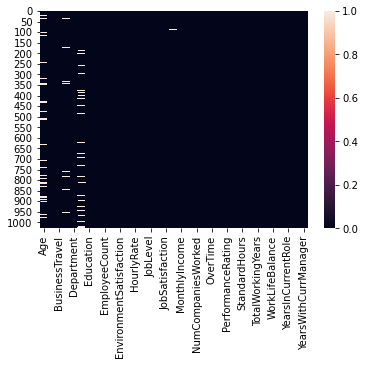

In [50]:
# Let's visualize the null values clearly using heat map
sns.heatmap(df.isnull())

There are null values in some of the column

In [51]:
Zero_value = pd.DataFrame(df.isin([0]).sum().sort_values(ascending=False))
Zero_value.columns=['Count of Zero values']
Zero_value['% of Zero values']=Zero_value['Count of Zero values']/2095.93    
Zero_value

Count of Zero values  % of Zero values
StockOptionLevel                           432          0.206114
YearsSinceLastPromotion                    415          0.198003
YearsWithCurrManager                       188          0.089698
YearsInCurrentRole                         169          0.080632
NumCompaniesWorked                         138          0.065842
TrainingTimesLastYear                       39          0.018607
YearsAtCompany                              31          0.014791
TotalWorkingYears                            6          0.002863
EducationField                               0          0.000000
Gender                                       0          0.000000
EnvironmentSatisfaction                      0          0.000000
EmployeeNumber                               0          0.000000
EmployeeCount                                0          0.000000
Department                                   0          0.000000
Education                                    0          0.000000
DistanceFromHome                             0          0.000000
JobInvolvement                               0          0.000000
DailyRate                                    0          0.000000
BusinessTravel                               0          0.000000
Attrition                                    0          0.000000
HourlyRate                                   0          0.000000
MaritalStatus                                0          0.000000
JobLevel                                     0          0.000000
JobRole                                      0          0.000000
JobSatisfaction                              0          0.000000
MonthlyIncome                                0          0.000000
MonthlyRate                                  0          0.000000
Over18                                       0          0.000000
OverTime                                     0          0.000000
PercentSalaryHike                            0          0.000000
PerformanceRating                            0          0.000000
RelationshipSatisfaction                     0          0.000000
StandardHours                                0          0.000000
WorkLifeBalance                              0          0.000000
Age                                          0          0.000000

In [52]:
# checkig the unique value present in column 'Year'
print("No of unique values present in Year column:",df['EducationField'].nunique())

No of unique values present in Year column: 6


As we can see there is only 6 unique values

In [53]:
# Checking the uniqueness of target column
print("The unique value present in Attrition is:",df['Attrition'].unique())

The unique value present in Attrition is: ['No' 'Yes']


In [54]:
# Statistical summary of dataset
df.describe().T

count          mean          std     min      25%  \
Age                        893.0     37.930571     9.395978    18.0    31.00   
DailyRate                 1002.0    800.528942   408.109828   102.0   458.25   
DistanceFromHome           934.0      9.930407     8.421791     1.0     2.00   
Education                 1029.0      2.892128     1.053541     1.0     2.00   
EmployeeCount             1029.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1029.0   1024.367347   606.301635     1.0   496.00   
EnvironmentSatisfaction   1029.0      2.683188     1.096829     1.0     2.00   
HourlyRate                1029.0     66.680272    20.474094    30.0    48.00   
JobInvolvement            1029.0      2.713314     0.710146     1.0     2.00   
JobLevel                  1029.0      2.043732     1.118918     1.0     1.00   
JobSatisfaction           1029.0      2.712342     1.096889     1.0     2.00   
MonthlyIncome             1029.0   6449.796890  4794.525367  1009.0  2814.00   
MonthlyRate               1029.0  14250.629738  7088.757938  2094.0  7950.00   
NumCompaniesWorked        1029.0      2.653061     2.508186     0.0     1.00   
PercentSalaryHike         1029.0     15.260447     3.665779    11.0    12.00   
PerformanceRating         1029.0      3.159378     0.366206     3.0     3.00   
RelationshipSatisfaction  1029.0      2.689990     1.077767     1.0     2.00   
StandardHours             1029.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1029.0      0.822157     0.874662     0.0     0.00   
TotalWorkingYears         1029.0     11.196307     7.857581     0.0     6.00   
TrainingTimesLastYear     1029.0      2.782313     1.283401     0.0     2.00   
WorkLifeBalance           1029.0      2.748299     0.697278     1.0     2.00   
YearsAtCompany            1029.0      6.942663     6.068322     0.0     3.00   
YearsInCurrentRole        1029.0      4.215743     3.658595     0.0     2.00   
YearsSinceLastPromotion   1029.0      2.119534     3.108651     0.0     0.00   
YearsWithCurrManager      1029.0      4.005831     3.522574     0.0     2.00   

                              50%      75%      max  
Age                          37.0     44.0     60.0  
DailyRate                   801.5   1162.0   1496.0  
DistanceFromHome              8.0     16.0     29.0  
Education                     3.0      4.0      5.0  
EmployeeCount                 1.0      1.0      1.0  
EmployeeNumber             1019.0   1553.0   2068.0  
EnvironmentSatisfaction       3.0      4.0      4.0  
HourlyRate                   67.0     84.0    100.0  
JobInvolvement                3.0      3.0      4.0  
JobLevel                      2.0      3.0      5.0  
JobSatisfaction               3.0      4.0      4.0  
MonthlyIncome              4735.0   8446.0  19999.0  
MonthlyRate               14295.0  20392.0  26999.0  
NumCompaniesWorked            1.0      4.0      9.0  
PercentSalaryHike            14.0     18.0     25.0  
PerformanceRating             3.0      3.0      4.0  
RelationshipSatisfaction      3.0      4.0      4.0  
StandardHours                80.0     80.0     80.0  
StockOptionLevel              1.0      1.0      3.0  
TotalWorkingYears            10.0     15.0     40.0  
TrainingTimesLastYear         3.0      3.0      6.0  
WorkLifeBalance               3.0      3.0      4.0  
YearsAtCompany                5.0     10.0     37.0  
YearsInCurrentRole            3.0      7.0     18.0  
YearsSinceLastPromotion       1.0      2.0     15.0  
YearsWithCurrManager          3.0      7.0     17.0

<AxesSubplot:>

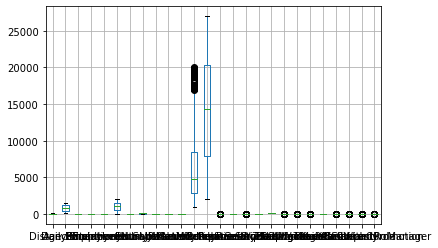

In [55]:
df.boxplot()

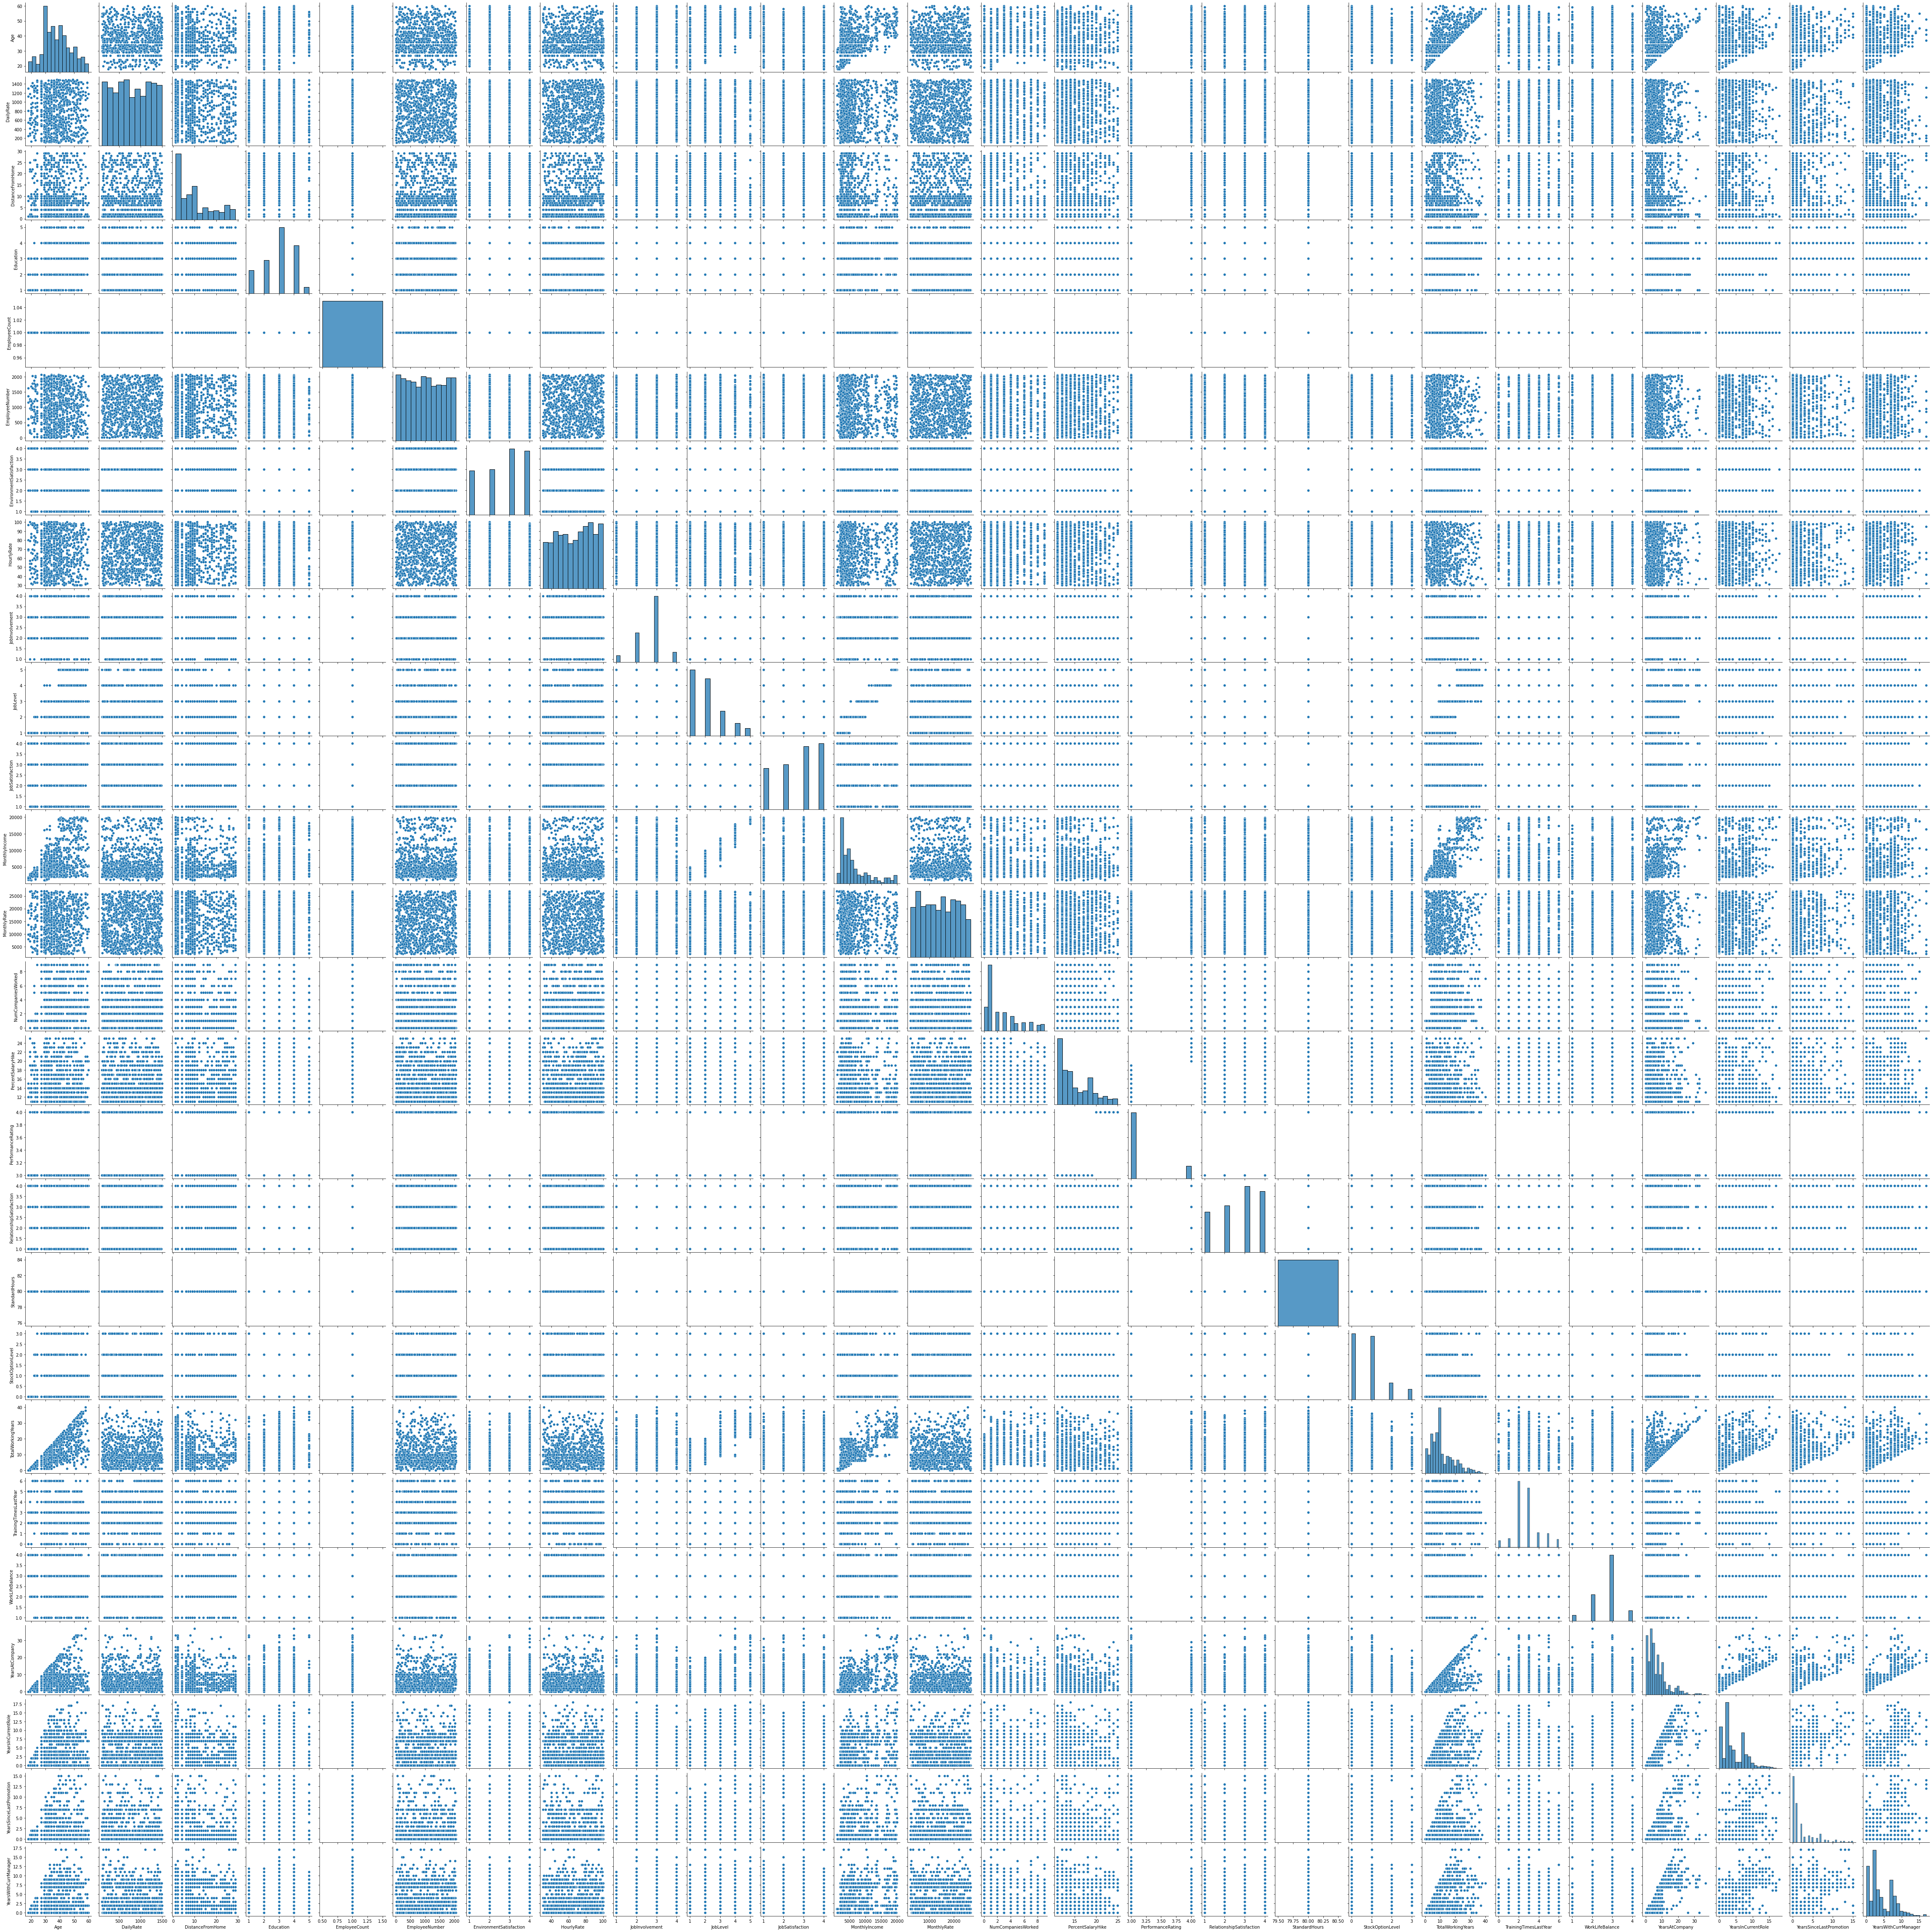

In [55]:
#relationship between two variables

sns.pairplot(df)

## Data Visualization


### Univariate Analysis
### Attrition (Target variable)

In [56]:
Rows = df.shape[0]
Non_Defaulter = df[df["Attrition"] == 1].shape[0]
Defaulter = df[df["Attrition"] == 0].shape[0]
print("Total records = ",Rows)
print("Non_Defaulter = ",Non_Defaulter)
print("Defaulter     = ",Defaulter)

Total records =  1029
Non_Defaulter =  0
Defaulter     =  0


<AxesSubplot:ylabel='Attrition'>

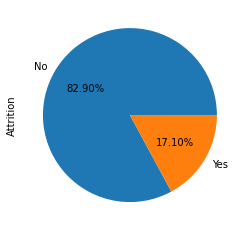

In [57]:
df['Attrition'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='Attrition', ylabel='count'>

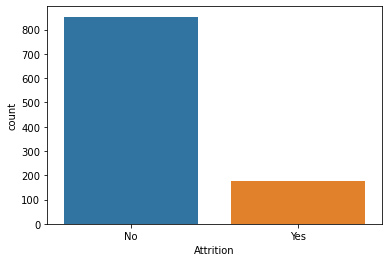

In [58]:
#observation count in different categories

sns.countplot(data=df,x='Attrition')

<AxesSubplot:ylabel='Education'>

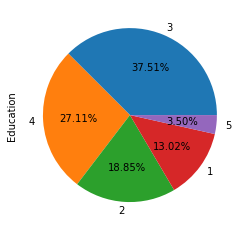

In [59]:
df['Education'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='Education', ylabel='count'>

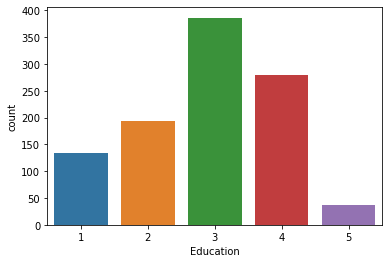

In [60]:
#observation count in different categories

sns.countplot(data=df,x='Education')

<AxesSubplot:ylabel='Department'>

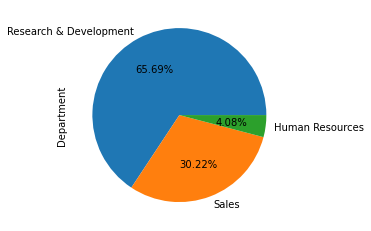

In [61]:
df['Department'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='Department', ylabel='count'>

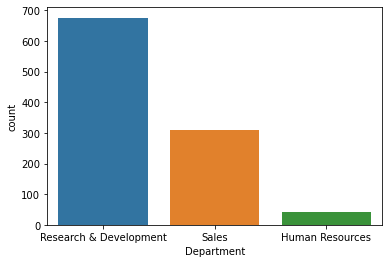

In [62]:
#observation count in different categories

sns.countplot(data=df,x='Department')

<AxesSubplot:ylabel='BusinessTravel'>

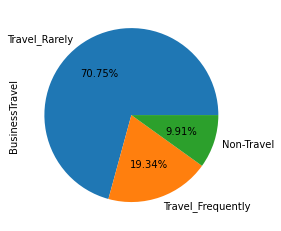

In [63]:
df['BusinessTravel'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

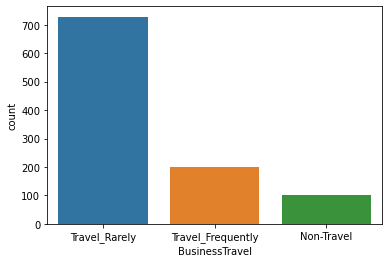

In [64]:
#observation count in different categories

sns.countplot(data=df,x='BusinessTravel')

<AxesSubplot:ylabel='Gender'>

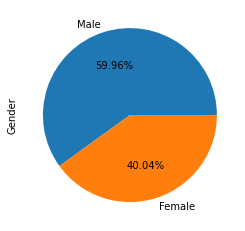

In [65]:
df['Gender'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='Gender', ylabel='count'>

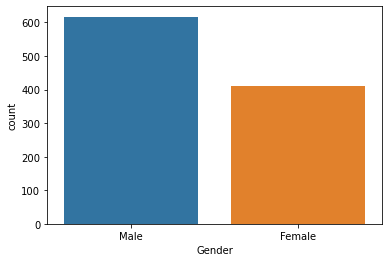

In [66]:
#observation count in different categories

sns.countplot(data=df,x='Gender')

<AxesSubplot:ylabel='JobInvolvement'>

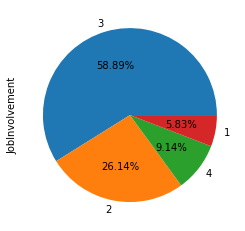

In [67]:
df['JobInvolvement'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

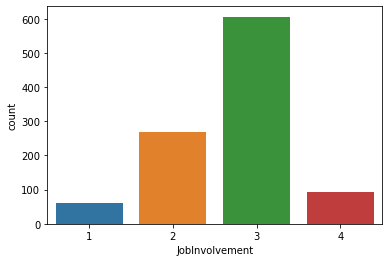

In [68]:
#observation count in different categories

sns.countplot(data=df,x='JobInvolvement')

<AxesSubplot:ylabel='JobLevel'>

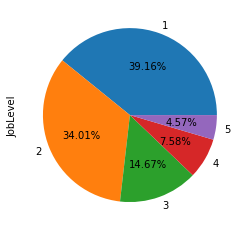

In [69]:
df['JobLevel'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

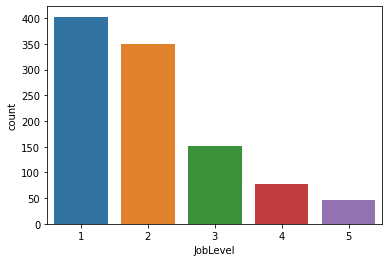

In [70]:
#observation count in different categories

sns.countplot(data=df,x='JobLevel')

<AxesSubplot:ylabel='JobSatisfaction'>

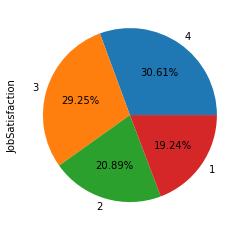

In [71]:
df['JobSatisfaction'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

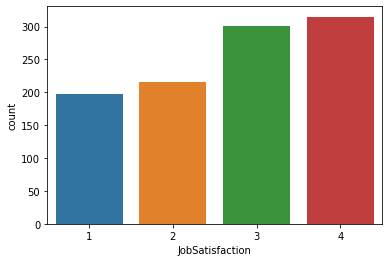

In [72]:
#observation count in different categories

sns.countplot(data=df,x='JobSatisfaction')

<AxesSubplot:ylabel='MaritalStatus'>

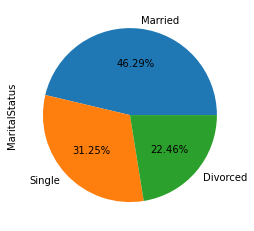

In [73]:
df['MaritalStatus'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

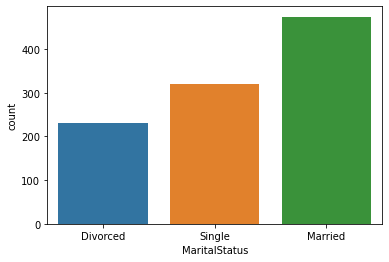

In [74]:
#observation count in different categories

sns.countplot(data=df,x='MaritalStatus')

<AxesSubplot:ylabel='OverTime'>

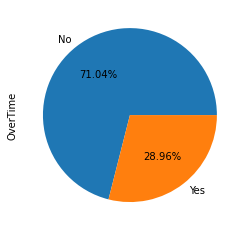

In [75]:
df['OverTime'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='OverTime', ylabel='count'>

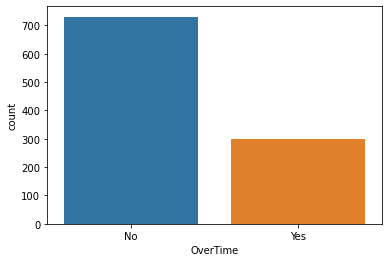

In [76]:
#observation count in different categories

sns.countplot(data=df,x='OverTime')

<AxesSubplot:ylabel='PerformanceRating'>

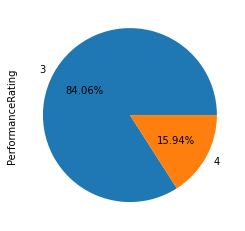

In [77]:
df['PerformanceRating'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

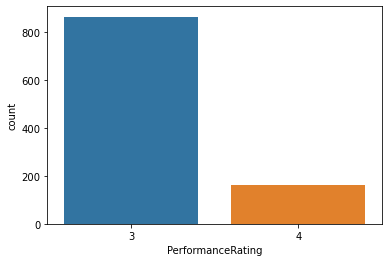

In [78]:
#observation count in different categories

sns.countplot(data=df,x='PerformanceRating')

<AxesSubplot:ylabel='RelationshipSatisfaction'>

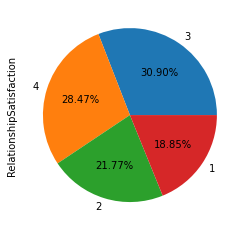

In [79]:
df['RelationshipSatisfaction'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

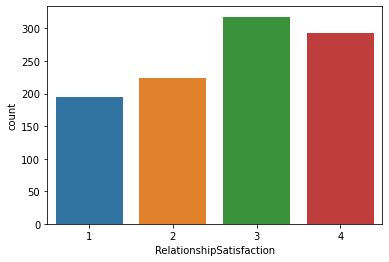

In [80]:
#observation count in different categories

sns.countplot(data=df,x='RelationshipSatisfaction')

<AxesSubplot:ylabel='StandardHours'>

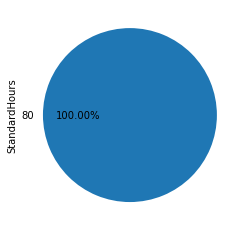

In [81]:
df['StandardHours'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='StandardHours', ylabel='count'>

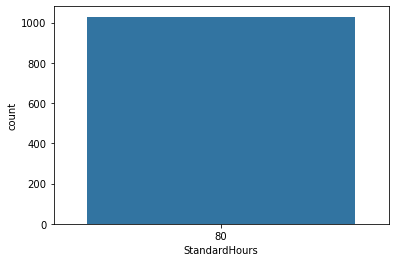

In [82]:
#observation count in different categories

sns.countplot(data=df,x='StandardHours')

<AxesSubplot:ylabel='StockOptionLevel'>

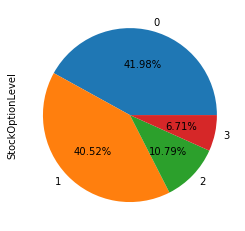

In [83]:
df['StockOptionLevel'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

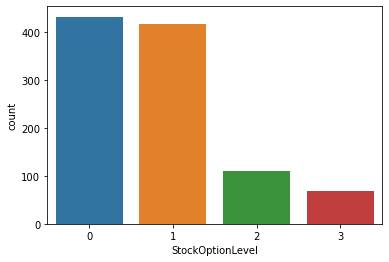

In [84]:
#observation count in different categories

sns.countplot(data=df,x='StockOptionLevel')

In [57]:
#display numerical columns

numcol=df.select_dtypes(['int64','float64']).columns
numcol

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [58]:
#display categorical columns

catcol=df.select_dtypes(['object']).columns
catcol

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

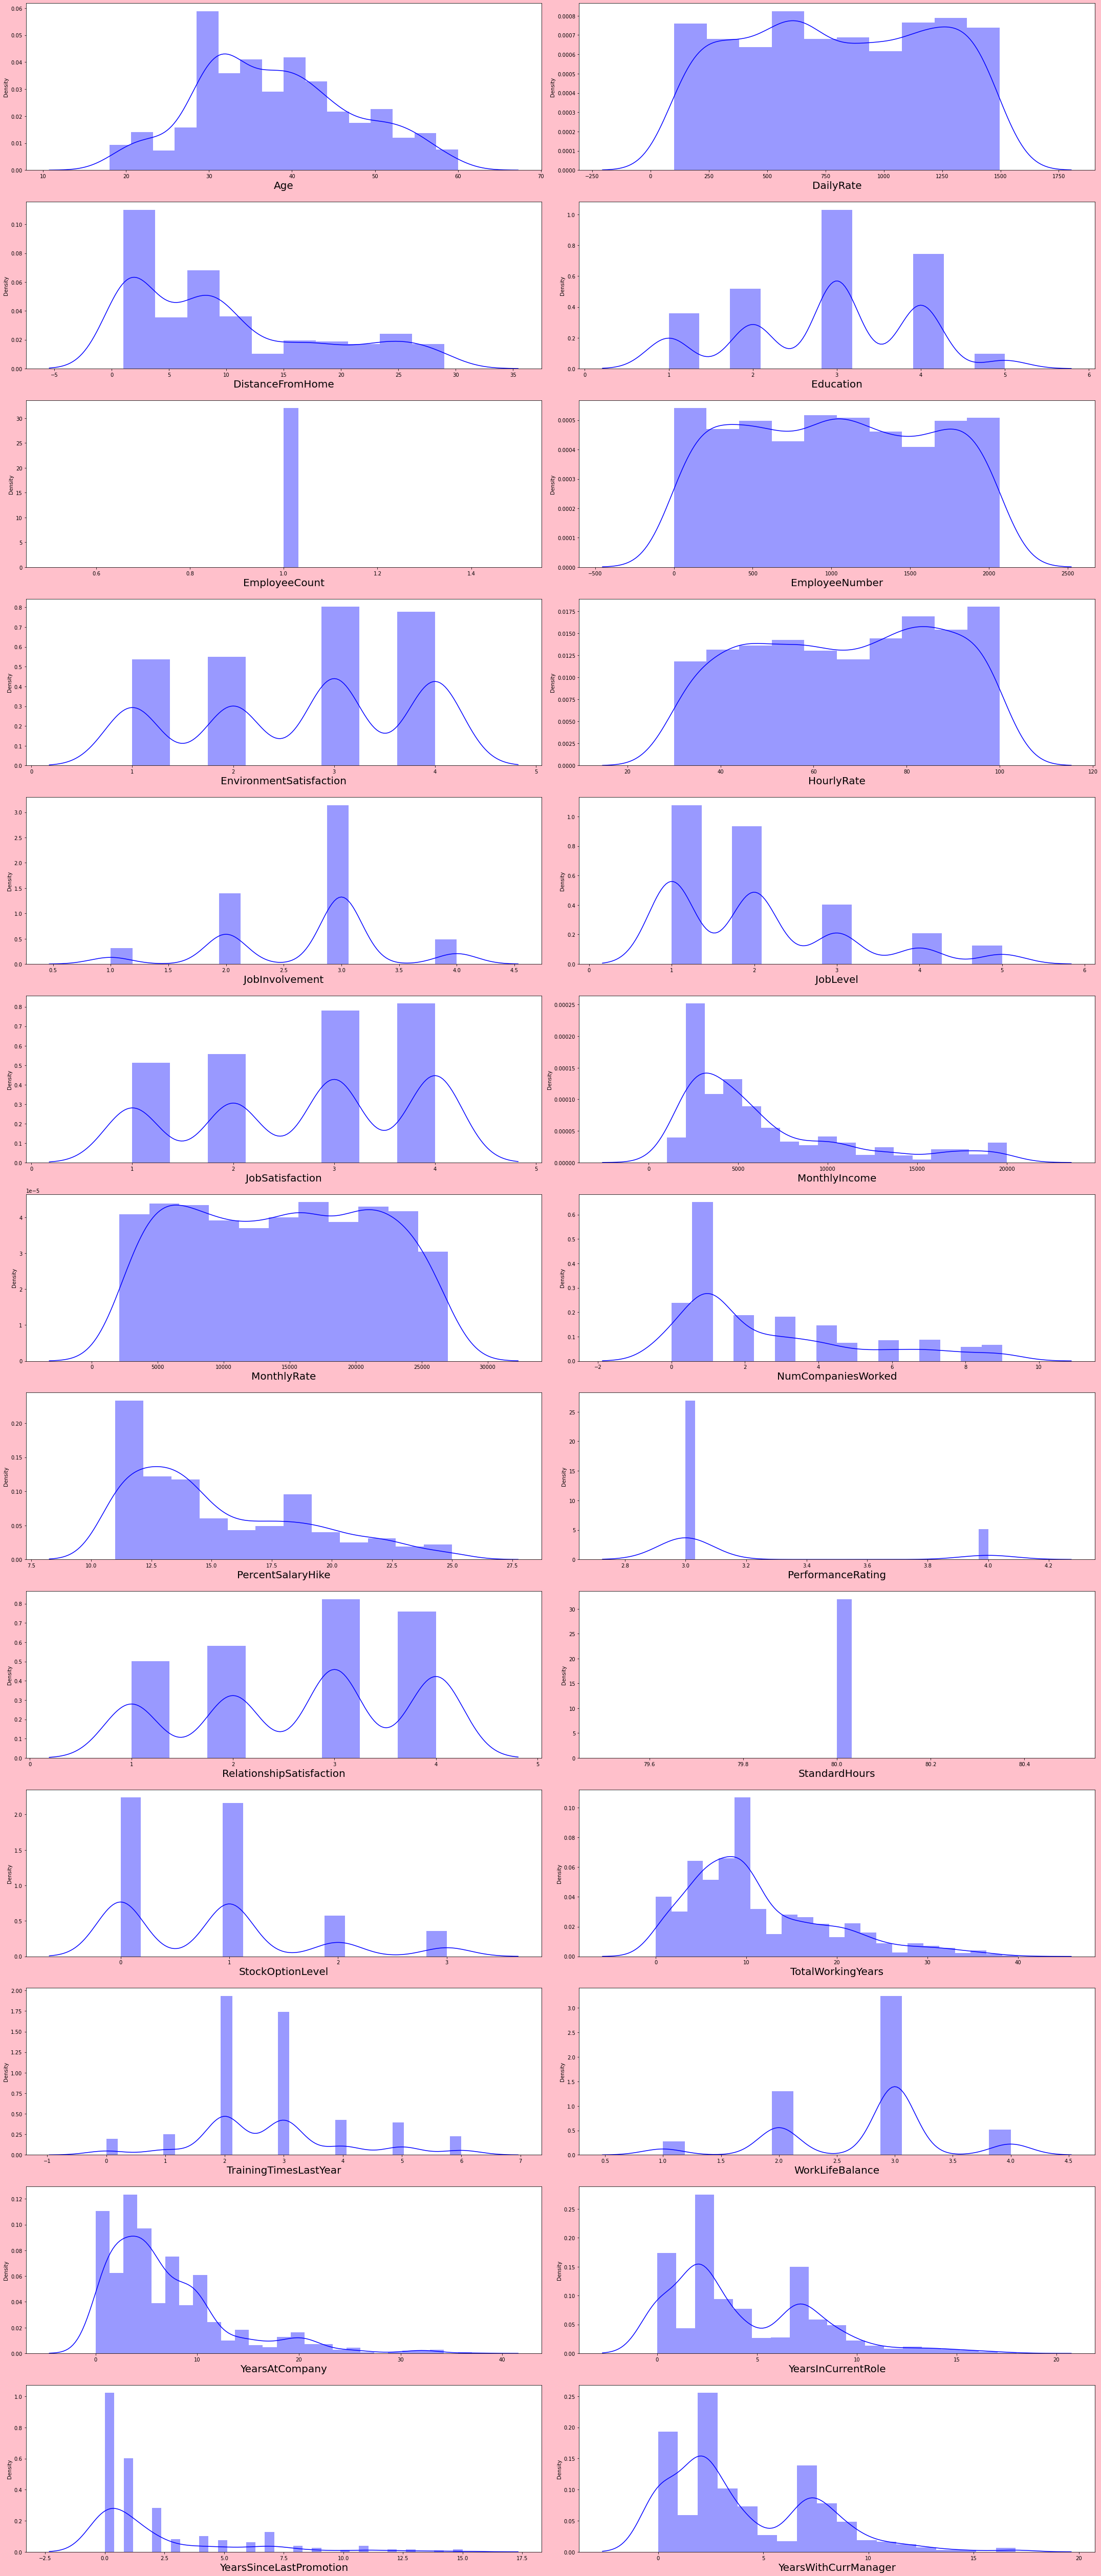

In [59]:
#distplot represent the univariate distribution
#checking for skewness

plt.figure(figsize=(30,70),facecolor="pink")
pltn=1
for i in numcol:
    if pltn<=26:
        ax=plt.subplot(13,2,pltn)
        sns.distplot(df[i],color="blue")
        plt.xlabel(i,fontsize=20)
    pltn=pltn+1
plt.tight_layout()

In [60]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  893.000000  1002.000000        934.000000  1029.000000         1029.0   
mean    37.930571   800.528942          9.930407     2.892128            1.0   
std      9.395978   408.109828          8.421791     1.053541            0.0   
min     18.000000   102.000000          1.000000     1.000000            1.0   
25%     31.000000   458.250000          2.000000     2.000000            1.0   
50%     37.000000   801.500000          8.000000     3.000000            1.0   
75%     44.000000  1162.000000         16.000000     4.000000            1.0   
max     60.000000  1496.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1029.000000              1029.000000  1029.000000     1029.000000   
mean      1024.367347                 2.683188    66.680272        2.713314   
std        606.301635                 1.096829    20.474094        0.710146   
min          1.000000                 1.000000    30.000000        1.000000   
25%        496.000000                 2.000000    48.000000        2.000000   
50%       1019.000000                 3.000000    67.000000        3.000000   
75%       1553.000000                 4.000000    84.000000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1029.000000  ...               1029.000000         1029.0   
mean      2.043732  ...                  2.689990           80.0   
std       1.118918  ...                  1.077767            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1029.000000        1029.000000            1029.000000   
mean           0.822157          11.196307               2.782313   
std            0.874662           7.857581               1.283401   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1029.000000     1029.000000         1029.000000   
mean          2.748299        6.942663            4.215743   
std           0.697278        6.068322            3.658595   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000       10.000000            7.000000   
max           4.000000       37.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1029.000000           1029.000000  
mean                  2.119534              4.005831  
std                   3.108651              3.522574  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   2.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

### Bivariate Analysis (Comparing label with remaining features)

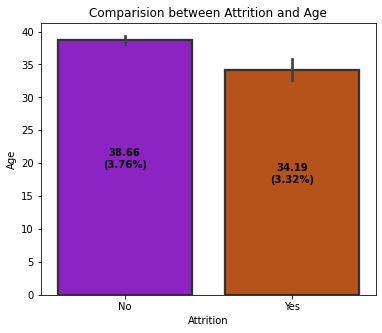

In [61]:
# Visualizing the age on cellular network in days and whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
plt.figure(figsize=(6,5))
ax = sns.barplot(df['Attrition'],df['Age'], data=df,palette="gnuplot",linewidth=2.3, edgecolor=".2");
index=0

for i in ax.patches:
    height = round(i.get_height(),2)
    total = len(df["Age"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Comparision between Attrition and Age')
plt.show()

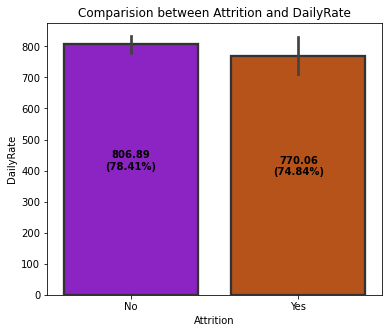

In [62]:
plt.figure(figsize=(6,5))
ax = sns.barplot(df['Attrition'],df['DailyRate'], data=df,palette="gnuplot",linewidth=2.3, edgecolor=".2");
index=0

for i in ax.patches:
    height = round(i.get_height(),2)
    total = len(df["DailyRate"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Comparision between Attrition and DailyRate')
plt.show()

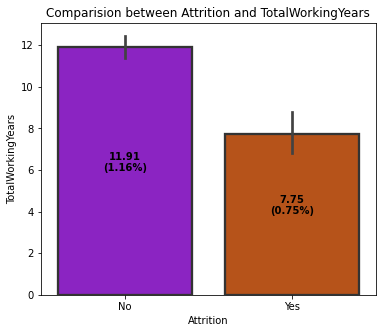

In [63]:
plt.figure(figsize=(6,5))
ax = sns.barplot(df['Attrition'],df['TotalWorkingYears'], data=df,palette="gnuplot",linewidth=2.3, edgecolor=".2");
index=0

for i in ax.patches:
    height = round(i.get_height(),2)
    total = len(df["TotalWorkingYears"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Comparision between Attrition and TotalWorkingYears')
plt.show()

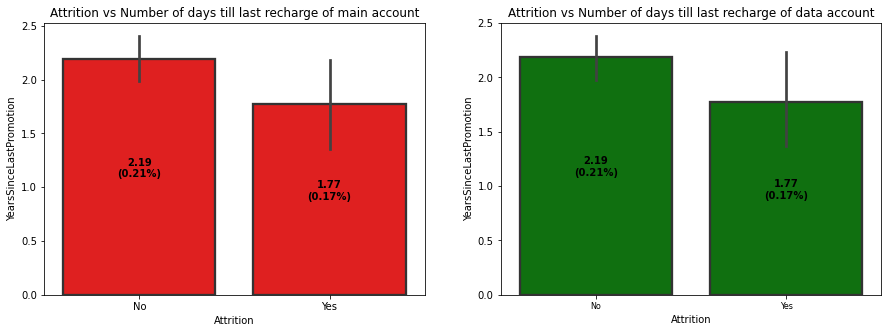

In [64]:

plt.figure(figsize=(15,5))

# Comparing Attrition vs year of last promotion
plt.subplot(1,2,1)
index=0
a=sns.barplot(x=df['Attrition'],y=df['YearsSinceLastPromotion'],linewidth=2.3, edgecolor=".2",color="r")

for i in a.patches:
    height = round(i.get_height(),2)
    total = len(df["YearsSinceLastPromotion"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Attrition vs Number of days till last recharge of main account')

# Comparing Attrition vs year of last promotion
plt.subplot(1,2,2)
b=sns.barplot(x=df['Attrition'],y=df['YearsSinceLastPromotion'],linewidth=2.3, edgecolor=".2",color="g")
index=0

for j in b.patches:
    height = round(j.get_height(),2)
    total = len(df["YearsSinceLastPromotion"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Attrition vs Number of days till last recharge of data account')

plt.xticks(fontsize='8')
plt.show()

In [65]:
numcol

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

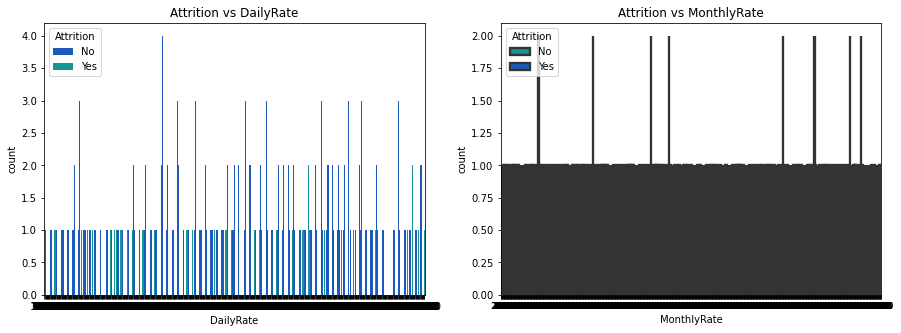

In [66]:
plt.figure(figsize=(15,5))

# Comparing Attrition vs DailyRate
plt.subplot(1,2,1)
sns.countplot(x=df['DailyRate'],hue=df["Attrition"],linewidth=2.3,palette="winter")
plt.title('Attrition vs DailyRate')

# Comparing Attrition vs Average payback time in DailyRate over last 90 days
plt.subplot(1,2,2)
sns.countplot(x=df['MonthlyRate'],hue=df['Attrition'],linewidth=2.3, edgecolor=".2",palette="winter_r")
plt.title('Attrition vs MonthlyRate')
plt.xticks(fontsize='8')
plt.show()


Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95

In [67]:
#for handling the missing data in the predictive model dataset

from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='mean')
df[['Age','DailyRate','DistanceFromHome']]=si.fit_transform(df[['Age','DailyRate','DistanceFromHome']])

In [68]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               5
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [69]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df[['MaritalStatus']]=si.fit_transform(df[['MaritalStatus']])

In [70]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [71]:
#display categorical columns

catcol=df.select_dtypes(['object']).columns
catcol

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [72]:
#handaling categorical data

from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[catcol]=oe.fit_transform(df[catcol])

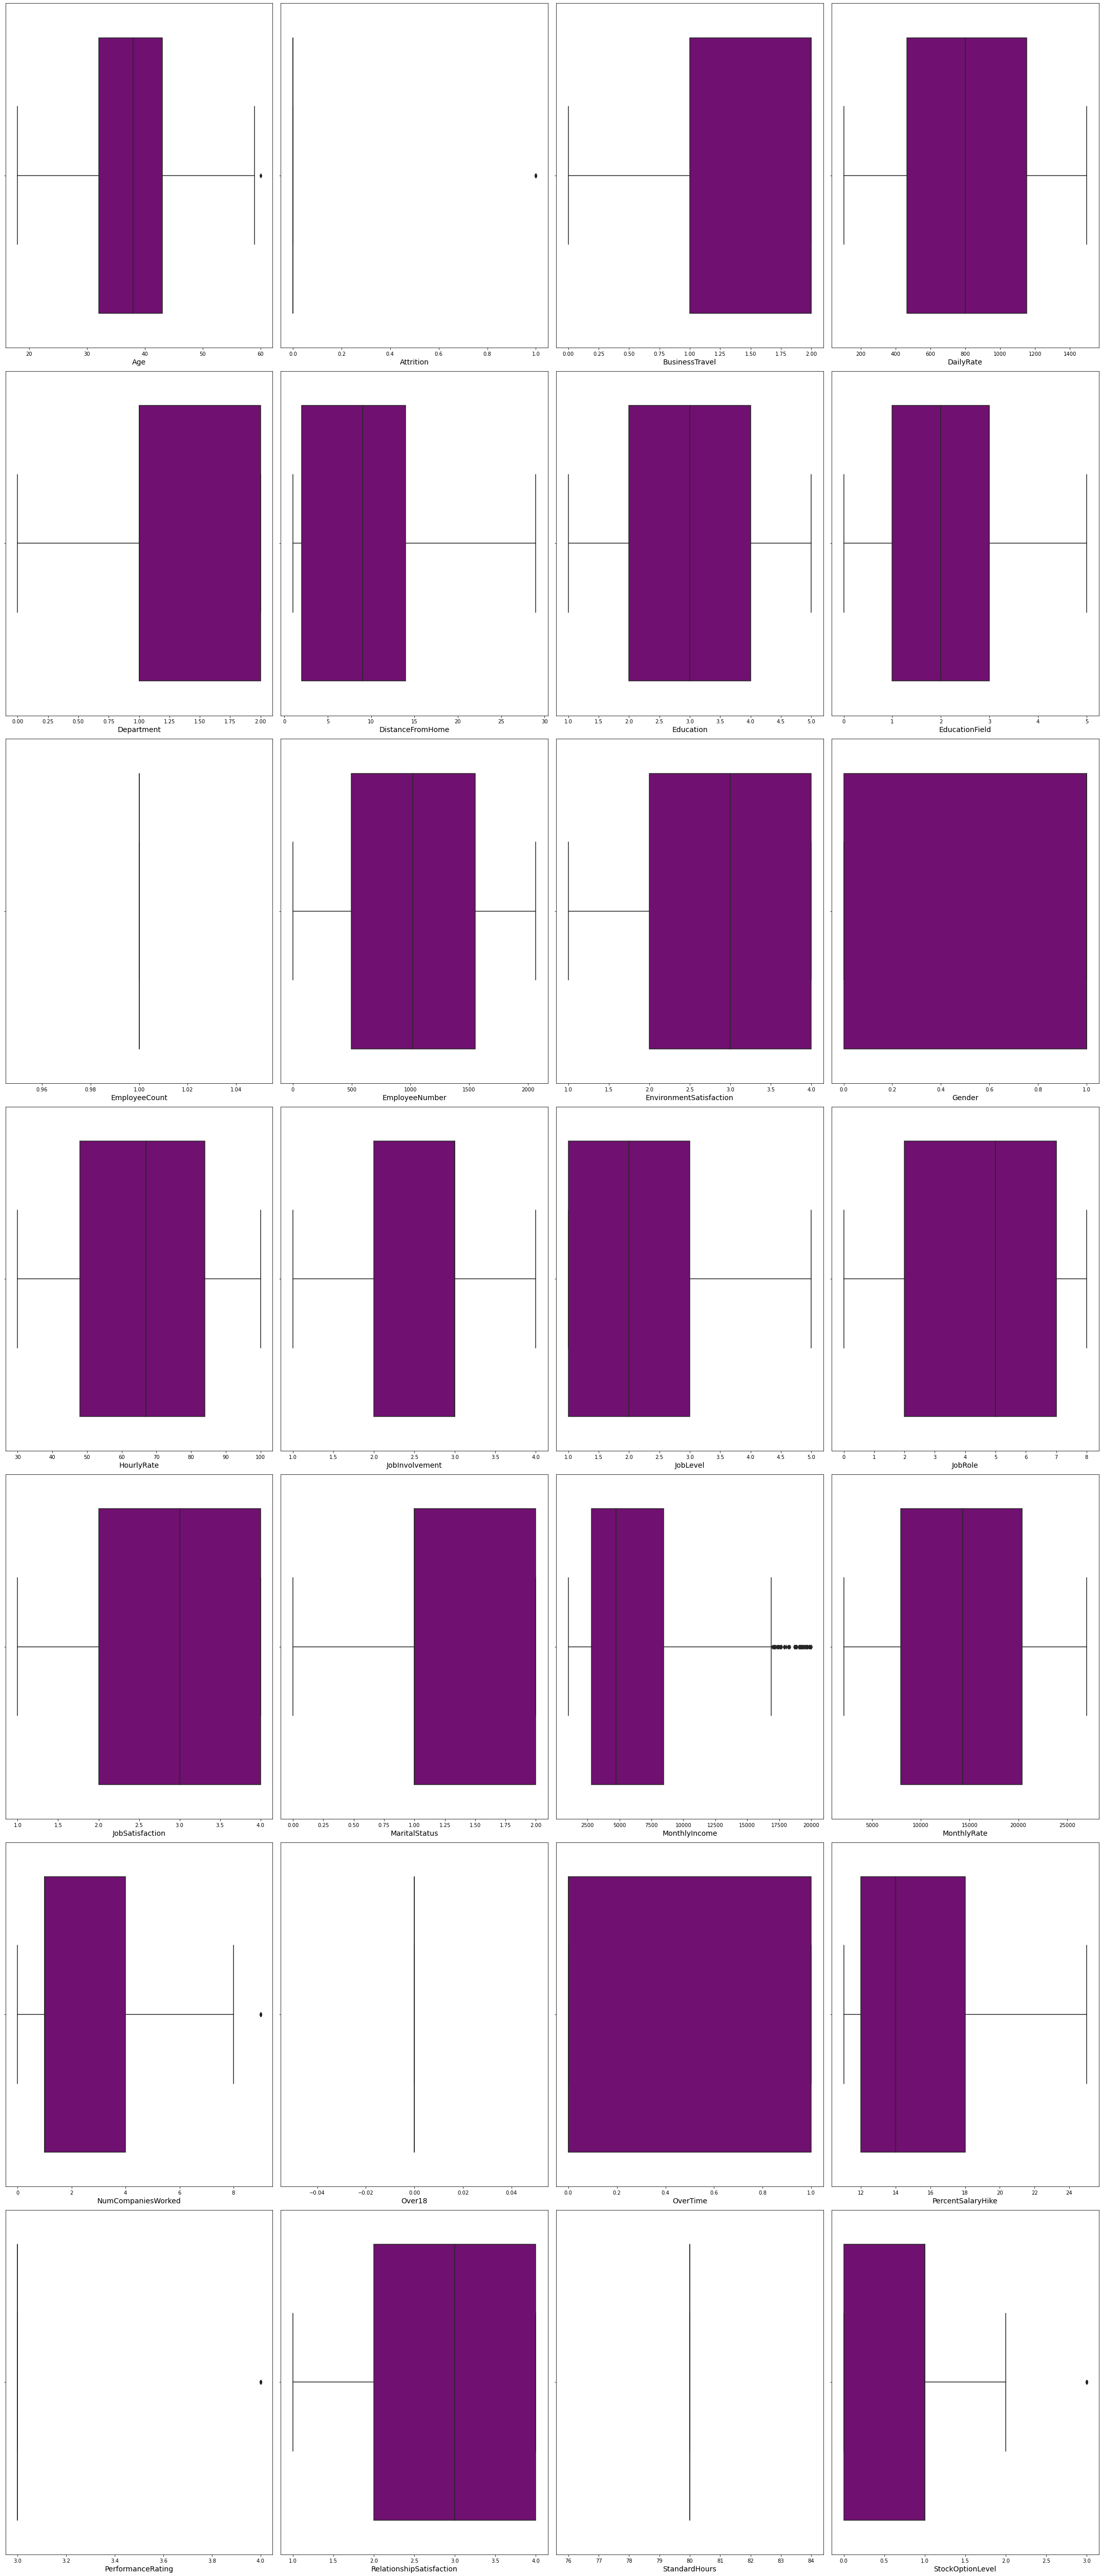

In [73]:
# Identifying the outliers using boxplot
plt.figure(figsize=(30,70),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column],color="purple")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

In [74]:
#handaling categorical data

from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[catcol]=oe.fit_transform(df[catcol])

In [75]:
df

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     50.000000        0.0             2.0     1126.0         1.0   
1     36.000000        0.0             2.0      216.0         1.0   
2     21.000000        1.0             2.0      337.0         2.0   
3     50.000000        0.0             1.0     1246.0         0.0   
4     52.000000        0.0             2.0      994.0         1.0   
...         ...        ...             ...        ...         ...   
1024  37.930571        0.0             2.0      750.0         1.0   
1025  41.000000        0.0             2.0      447.0         1.0   
1026  22.000000        1.0             1.0     1256.0         1.0   
1027  29.000000        0.0             2.0     1378.0         1.0   
1028  50.000000        0.0             2.0      264.0         2.0   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0             1.000000          2             3.0              1   
1             6.000000          2             3.0              1   
2             7.000000          1             2.0              1   
3             9.930407          3             3.0              1   
4             7.000000          4             1.0              1   
...                ...        ...             ...            ...   
1024         28.000000          3             1.0              1   
1025          9.930407          3             1.0              1   
1026          9.930407          4             1.0              1   
1027         13.000000          2             4.0              1   
1028          9.000000          3             2.0              1   

      EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
0                997  ...                         3             80   
1                178  ...                         4             80   
2               1780  ...                         2             80   
3                644  ...                         3             80   
4               1118  ...                         4             80   
...              ...  ...                       ...            ...   
1024            1596  ...                         4             80   
1025            1814  ...                         1             80   
1026            1203  ...                         2             80   
1027            2053  ...                         1             80   
1028            1591  ...                         3             80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    1                 32                      1   
1                    2                  7                      0   
2                    0                  1                      3   
3                    1                 32                      2   
4                    0                 18                      4   
...                ...                ...                    ...   
1024                 2                 10                      3   
1025                 0                 11                      3   
1026                 1                  1                      5   
1027                 1                 10                      2   
1028                 1                 27                      2   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                   2               5                   4   
1                   3               3                   2   
2                   3               1                   0   
3                   3              32                   5   
4                   3               8                   6   
...               ...             ...                 ...   
1024                2              10                   9   
1025                1               3                   2   
1026                3               0                   0   
1027                3               4                   3   
1028                3               1

In [76]:
# Feature containing outliers
features= df[['Age','Attrition','BusinessTravel','EnvironmentSatisfaction','Department','DistanceFromHome', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

In [77]:
# Creating new dataframe by setting z to 3
new_df = df[(z<3).all(axis=1)] 
new_df

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     50.000000        0.0             2.0     1126.0         1.0   
1     36.000000        0.0             2.0      216.0         1.0   
2     21.000000        1.0             2.0      337.0         2.0   
3     50.000000        0.0             1.0     1246.0         0.0   
4     52.000000        0.0             2.0      994.0         1.0   
...         ...        ...             ...        ...         ...   
1024  37.930571        0.0             2.0      750.0         1.0   
1025  41.000000        0.0             2.0      447.0         1.0   
1026  22.000000        1.0             1.0     1256.0         1.0   
1027  29.000000        0.0             2.0     1378.0         1.0   
1028  50.000000        0.0             2.0      264.0         2.0   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0             1.000000          2             3.0              1   
1             6.000000          2             3.0              1   
2             7.000000          1             2.0              1   
3             9.930407          3             3.0              1   
4             7.000000          4             1.0              1   
...                ...        ...             ...            ...   
1024         28.000000          3             1.0              1   
1025          9.930407          3             1.0              1   
1026          9.930407          4             1.0              1   
1027         13.000000          2             4.0              1   
1028          9.000000          3             2.0              1   

      EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
0                997  ...                         3             80   
1                178  ...                         4             80   
2               1780  ...                         2             80   
3                644  ...                         3             80   
4               1118  ...                         4             80   
...              ...  ...                       ...            ...   
1024            1596  ...                         4             80   
1025            1814  ...                         1             80   
1026            1203  ...                         2             80   
1027            2053  ...                         1             80   
1028            1591  ...                         3             80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    1                 32                      1   
1                    2                  7                      0   
2                    0                  1                      3   
3                    1                 32                      2   
4                    0                 18                      4   
...                ...                ...                    ...   
1024                 2                 10                      3   
1025                 0                 11                      3   
1026                 1                  1                      5   
1027                 1                 10                      2   
1028                 1                 27                      2   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                   2               5                   4   
1                   3               3                   2   
2                   3               1                   0   
3                   3              32                   5   
4                   3               8                   6   
...               ...             ...                 ...   
1024                2              10                   9   
1025                1               3                   2   
1026                3               0                   0   
1027                3               4                   3   
1028                3               1

In [78]:
df

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     50.000000        0.0             2.0     1126.0         1.0   
1     36.000000        0.0             2.0      216.0         1.0   
2     21.000000        1.0             2.0      337.0         2.0   
3     50.000000        0.0             1.0     1246.0         0.0   
4     52.000000        0.0             2.0      994.0         1.0   
...         ...        ...             ...        ...         ...   
1024  37.930571        0.0             2.0      750.0         1.0   
1025  41.000000        0.0             2.0      447.0         1.0   
1026  22.000000        1.0             1.0     1256.0         1.0   
1027  29.000000        0.0             2.0     1378.0         1.0   
1028  50.000000        0.0             2.0      264.0         2.0   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0             1.000000          2             3.0              1   
1             6.000000          2             3.0              1   
2             7.000000          1             2.0              1   
3             9.930407          3             3.0              1   
4             7.000000          4             1.0              1   
...                ...        ...             ...            ...   
1024         28.000000          3             1.0              1   
1025          9.930407          3             1.0              1   
1026          9.930407          4             1.0              1   
1027         13.000000          2             4.0              1   
1028          9.000000          3             2.0              1   

      EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
0                997  ...                         3             80   
1                178  ...                         4             80   
2               1780  ...                         2             80   
3                644  ...                         3             80   
4               1118  ...                         4             80   
...              ...  ...                       ...            ...   
1024            1596  ...                         4             80   
1025            1814  ...                         1             80   
1026            1203  ...                         2             80   
1027            2053  ...                         1             80   
1028            1591  ...                         3             80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    1                 32                      1   
1                    2                  7                      0   
2                    0                  1                      3   
3                    1                 32                      2   
4                    0                 18                      4   
...                ...                ...                    ...   
1024                 2                 10                      3   
1025                 0                 11                      3   
1026                 1                  1                      5   
1027                 1                 10                      2   
1028                 1                 27                      2   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                   2               5                   4   
1                   3               3                   2   
2                   3               1                   0   
3                   3              32                   5   
4                   3               8                   6   
...               ...             ...                 ...   
1024                2              10                   9   
1025                1               3                   2   
1026                3               0                   0   
1027                3               4                   3   
1028                3               1

In [79]:

# Checking the shape of dataset before and after removing outliers
print("Shape of dataset before removing outliers:", df.shape)
print("Shape of dataset after removing outliers:", new_df.shape)

Shape of dataset before removing outliers: (1029, 35)
Shape of dataset after removing outliers: (1029, 35)


In [80]:
# Checking the the data loss after removing outliers
data_loss = (1029-1029)/1029*100
data_loss

0.0

In [81]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [82]:
print("Shape of data after using IQR method:", df1.shape)

Shape of data after using IQR method: (591, 35)


In [83]:
# Checking the the data loss after removing outliers
data_loss = (1029-591)/1029*100
data_loss

42.565597667638485

In [84]:
# Checking the skewness
df.skew()

Age                         0.254575
Attrition                   1.749813
BusinessTravel             -1.435731
DailyRate                  -0.003976
Department                  0.195508
DistanceFromHome            0.823546
Education                  -0.273762
EducationField              0.531904
EmployeeCount               0.000000
EmployeeNumber              0.021478
EnvironmentSatisfaction    -0.265805
Gender                     -0.407189
HourlyRate                 -0.088747
JobInvolvement             -0.503142
JobLevel                    1.024197
JobRole                    -0.376224
JobSatisfaction            -0.289601
MaritalStatus              -0.134727
MonthlyIncome               1.347580
MonthlyRate                 0.021858
NumCompaniesWorked          1.074606
Over18                      0.000000
OverTime                    0.929084
PercentSalaryHike           0.801288
PerformanceRating           1.863897
RelationshipSatisfaction   -0.266093
StandardHours               0.000000
S

In [85]:
df["BusinessTravel"]=np.sqrt(df["BusinessTravel"])
df["DistanceFromHome"]=np.sqrt(df["DistanceFromHome"])
df["EducationField"]=np.sqrt(df["EducationField"])
df["JobLevel"]=np.sqrt(df["JobLevel"])
df["MonthlyIncome"]=np.sqrt(df["MonthlyIncome"])
df["NumCompaniesWorked"]=np.sqrt(df["NumCompaniesWorked"])
df["OverTime"]=np.sqrt(df["OverTime"])
df["PercentSalaryHike"]=np.sqrt(df["PercentSalaryHike"])
df["PerformanceRating"]=np.sqrt(df["PerformanceRating"])
df["StockOptionLevel"]=np.sqrt(df["StockOptionLevel"])
df["TotalWorkingYears"]=np.sqrt(df["TotalWorkingYears"])
df["YearsAtCompany"]=np.sqrt(df["YearsAtCompany"])
df["YearsInCurrentRole"]=np.sqrt(df["YearsInCurrentRole"])
df["YearsSinceLastPromotion"]=np.sqrt(df["YearsSinceLastPromotion"])
df["YearsWithCurrManager"]=np.sqrt(df["YearsWithCurrManager"])


In [86]:
df.skew()

Age                         0.254575
Attrition                   1.749813
BusinessTravel             -2.081031
DailyRate                  -0.003976
Department                  0.195508
DistanceFromHome            0.172703
Education                  -0.273762
EducationField             -0.152327
EmployeeCount               0.000000
EmployeeNumber              0.021478
EnvironmentSatisfaction    -0.265805
Gender                     -0.407189
HourlyRate                 -0.088747
JobInvolvement             -0.503142
JobLevel                    0.615281
JobRole                    -0.376224
JobSatisfaction            -0.289601
MaritalStatus              -0.134727
MonthlyIncome               0.871697
MonthlyRate                 0.021858
NumCompaniesWorked          0.080957
Over18                      0.000000
OverTime                    0.929084
PercentSalaryHike           0.636787
PerformanceRating           1.863897
RelationshipSatisfaction   -0.266093
StandardHours               0.000000
S

In [87]:
df["BusinessTravel"]=np.sqrt(df["BusinessTravel"])
df["MonthlyIncome"]=np.sqrt(df["MonthlyIncome"])
df["OverTime"]=np.sqrt(df["OverTime"])
df["PercentSalaryHike"]=np.sqrt(df["PercentSalaryHike"])
df["PerformanceRating"]=np.sqrt(df["PerformanceRating"])
df["YearsSinceLastPromotion"]=np.sqrt(df["YearsSinceLastPromotion"])

In [88]:
df.skew()

Age                         0.254575
Attrition                   1.749813
BusinessTravel             -2.481657
DailyRate                  -0.003976
Department                  0.195508
DistanceFromHome            0.172703
Education                  -0.273762
EducationField             -0.152327
EmployeeCount               0.000000
EmployeeNumber              0.021478
EnvironmentSatisfaction    -0.265805
Gender                     -0.407189
HourlyRate                 -0.088747
JobInvolvement             -0.503142
JobLevel                    0.615281
JobRole                    -0.376224
JobSatisfaction            -0.289601
MaritalStatus              -0.134727
MonthlyIncome               0.609809
MonthlyRate                 0.021858
NumCompaniesWorked          0.080957
Over18                      0.000000
OverTime                    0.929084
PercentSalaryHike           0.556412
PerformanceRating           1.863897
RelationshipSatisfaction   -0.266093
StandardHours               0.000000
S

<AxesSubplot:>

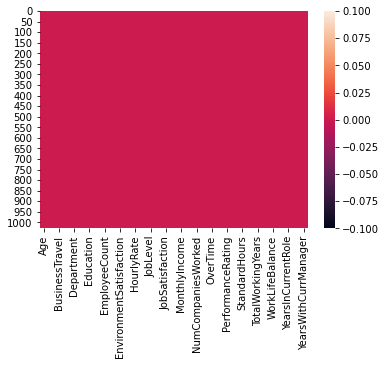

In [89]:
sns.heatmap(df.isnull())

In [90]:
# Checking the correlation between features and the target
cor = df.corr()
cor

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.160176        0.045641   0.021999   
Attrition                -0.160176   1.000000        0.061770  -0.033794   
BusinessTravel            0.045641   0.061770        1.000000  -0.002558   
DailyRate                 0.021999  -0.033794       -0.002558   1.000000   
Department               -0.036827   0.073814        0.002199  -0.008587   
DistanceFromHome         -0.047712   0.062427       -0.036100  -0.014867   
Education                 0.212995  -0.022094        0.010771  -0.055751   
EducationField           -0.003883   0.043308        0.047497   0.051474   
EmployeeCount                  NaN        NaN             NaN        NaN   
EmployeeNumber           -0.013967   0.016449       -0.011947  -0.053794   
EnvironmentSatisfaction  -0.022540  -0.082964       -0.002401  -0.001417   
Gender                    0.011860   0.039339       -0.069581  -0.010147   
HourlyRate                0.018563  -0.007533        0.040906   0.028113   
JobInvolvement            0.022422  -0.129238        0.035206   0.046314   
JobLevel                  0.482880  -0.195413       -0.006932   0.019130   
JobRole                  -0.116225   0.095509        0.028713  -0.032833   
JobSatisfaction           0.007144  -0.102101       -0.015540   0.021878   
MaritalStatus            -0.081421   0.215499        0.061266  -0.091802   
MonthlyIncome             0.480221  -0.204859        0.009822   0.020699   
MonthlyRate               0.017491   0.002960       -0.019332  -0.003814   
NumCompaniesWorked        0.293539   0.053895        0.008534   0.042830   
Over18                         NaN        NaN             NaN        NaN   
OverTime                 -0.012597   0.273295        0.049674   0.013430   
PercentSalaryHike         0.011700  -0.011759       -0.034405   0.015565   
PerformanceRating         0.006980  -0.021510       -0.017517   0.017875   
RelationshipSatisfaction  0.058293  -0.036987       -0.016541   0.029459   
StandardHours                  NaN        NaN             NaN        NaN   
StockOptionLevel          0.054090  -0.207562       -0.032116   0.048099   
TotalWorkingYears         0.650070  -0.239467        0.029924   0.006010   
TrainingTimesLastYear    -0.024250  -0.051681        0.037315   0.022190   
WorkLifeBalance          -0.039244  -0.054439       -0.054025  -0.052937   
YearsAtCompany            0.268980  -0.204743       -0.021562  -0.034062   
YearsInCurrentRole        0.198871  -0.222988       -0.016137  -0.015743   
YearsSinceLastPromotion   0.137146  -0.076088       -0.021786  -0.056522   
YearsWithCurrManager      0.157960  -0.200141       -0.026508  -0.029208   

                          Department  DistanceFromHome  Education  \
Age                        -0.036827         -0.047712   0.212995   
Attrition                   0.073814          0.062427  -0.022094   
BusinessTravel              0.002199         -0.036100   0.010771   
DailyRate                  -0.008587         -0.014867  -0.055751   
Department                  1.000000          0.000305   0.012356   
DistanceFromHome            0.000305          1.000000   0.002298   
Education                   0.012356          0.002298   1.000000   
EducationField              0.091006          0.000681  -0.043318   
EmployeeCount                    NaN               NaN        NaN   
EmployeeNumber             -0.025052          0.032455   0.058632   
EnvironmentSatisfaction    -0.050362         -0.031946  -0.032129   
Gender                     -0.050312         -0.025736  -0.010252   
HourlyRate                 -0.028540         -0.018903   0.012786   
JobInvolvement             -0.038874          0.040973   0.049639   
JobLevel                    0.134277          0.008241   0.101249   
JobRole                     0.651878         -0.010311   0.013045   
JobSatisfaction             0.024319          0.011011   0.001742   
MaritalStatus               0.082950         -0.0092

<AxesSubplot:>

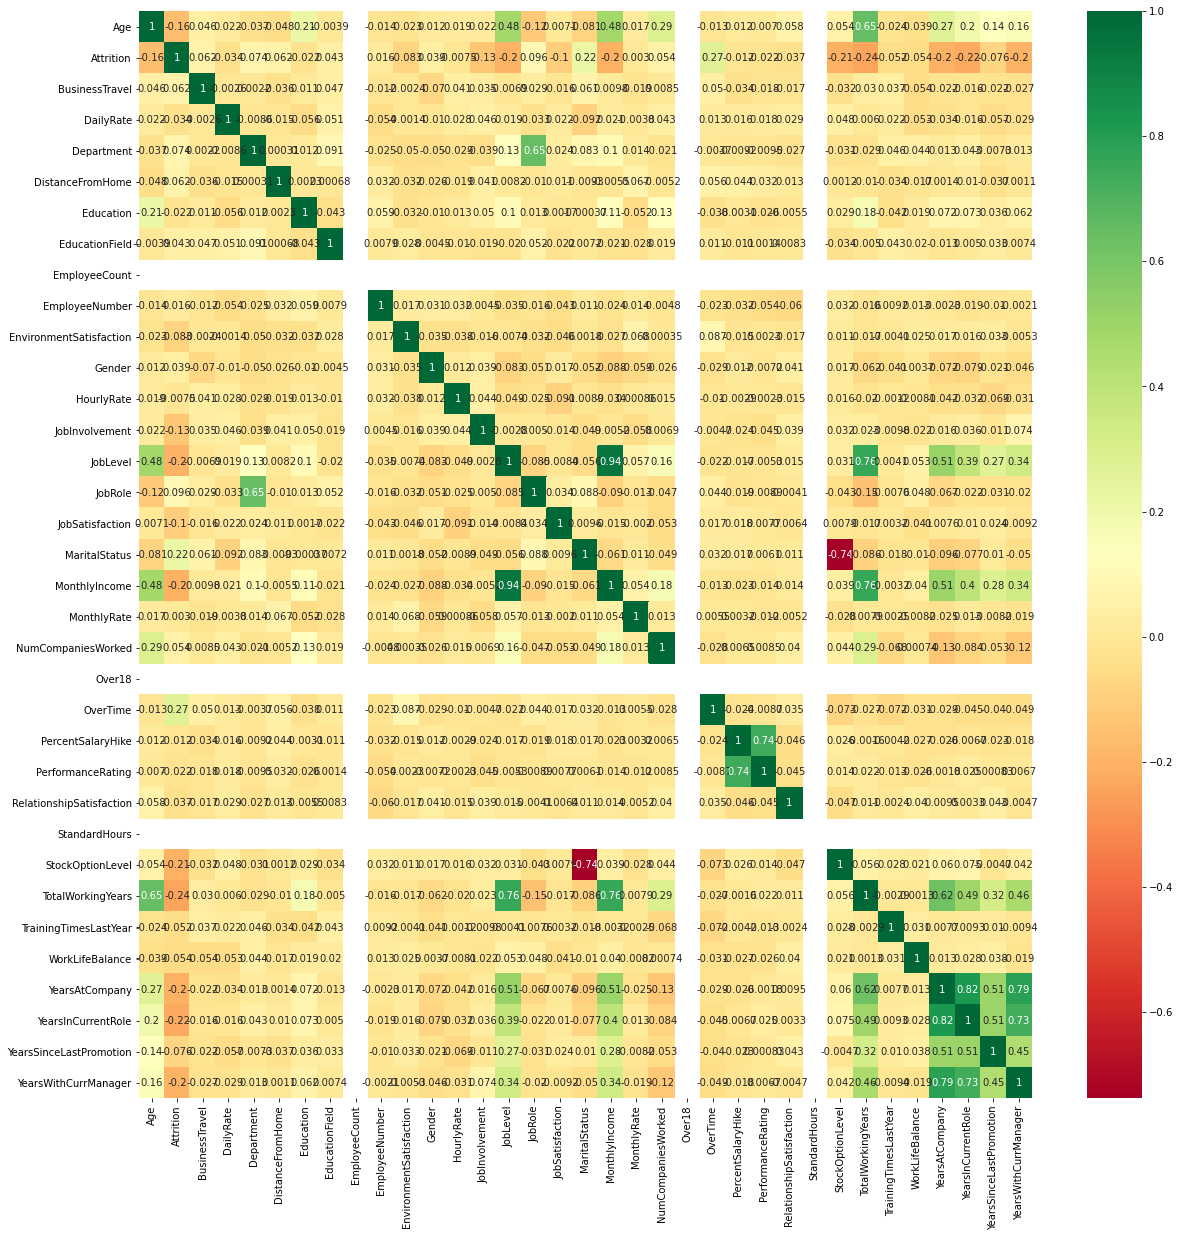

In [120]:
#visualize the strength of correlation among variables

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [91]:
cor['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.273295
MaritalStatus               0.215499
JobRole                     0.095509
Department                  0.073814
DistanceFromHome            0.062427
BusinessTravel              0.061770
NumCompaniesWorked          0.053895
EducationField              0.043308
Gender                      0.039339
EmployeeNumber              0.016449
MonthlyRate                 0.002960
HourlyRate                 -0.007533
PercentSalaryHike          -0.011759
PerformanceRating          -0.021510
Education                  -0.022094
DailyRate                  -0.033794
RelationshipSatisfaction   -0.036987
TrainingTimesLastYear      -0.051681
WorkLifeBalance            -0.054439
YearsSinceLastPromotion    -0.076088
EnvironmentSatisfaction    -0.082964
JobSatisfaction            -0.102101
JobInvolvement             -0.129238
Age                        -0.160176
JobLevel                   -0.195413
YearsWithCurrManager       -0.200141
Y

Here we can observe the negative correlation between features and label clearly

### Visualizing the correlation between Medal and features using bar plot

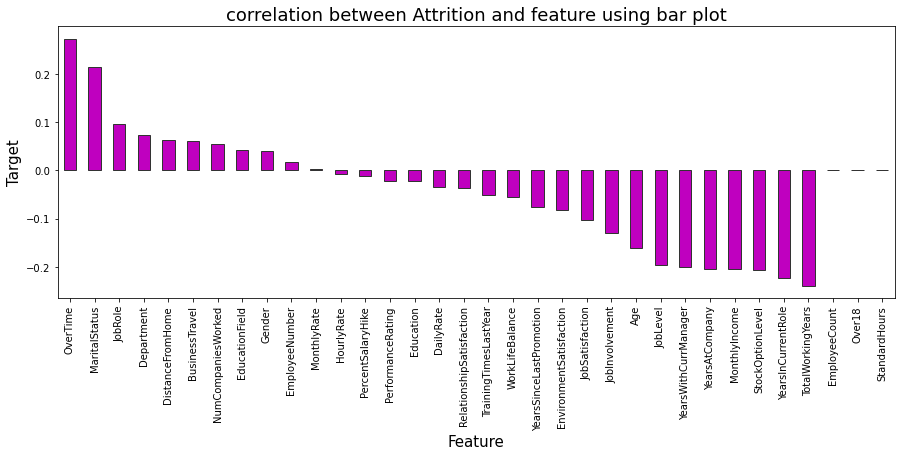

In [92]:
plt.figure(figsize=(15,5))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='m',edgecolor=".2")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between Attrition and feature using bar plot',fontsize=18)
plt.show()

In [123]:
df

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     50.000000        0.0        1.189207     1126.0         1.0   
1     36.000000        0.0        1.189207      216.0         1.0   
2     21.000000        1.0        1.189207      337.0         2.0   
3     50.000000        0.0        1.000000     1246.0         0.0   
4     52.000000        0.0        1.189207      994.0         1.0   
...         ...        ...             ...        ...         ...   
1024  37.930571        0.0        1.189207      750.0         1.0   
1025  41.000000        0.0        1.189207      447.0         1.0   
1026  22.000000        1.0        1.000000     1256.0         1.0   
1027  29.000000        0.0        1.189207     1378.0         1.0   
1028  50.000000        0.0        1.189207      264.0         2.0   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0             1.000000          2        1.732051              1   
1             2.449490          2        1.732051              1   
2             2.645751          1        1.414214              1   
3             3.151255          3        1.732051              1   
4             2.645751          4        1.000000              1   
...                ...        ...             ...            ...   
1024          5.291503          3        1.000000              1   
1025          3.151255          3        1.000000              1   
1026          3.151255          4        1.000000              1   
1027          3.605551          2        2.000000              1   
1028          3.000000          3        1.414214              1   

      EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
0                997  ...                         3             80   
1                178  ...                         4             80   
2               1780  ...                         2             80   
3                644  ...                         3             80   
4               1118  ...                         4             80   
...              ...  ...                       ...            ...   
1024            1596  ...                         4             80   
1025            1814  ...                         1             80   
1026            1203  ...                         2             80   
1027            2053  ...                         1             80   
1028            1591  ...                         3             80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             1.000000           5.656854                      1   
1             1.414214           2.645751                      0   
2             0.000000           1.000000                      3   
3             1.000000           5.656854                      2   
4             0.000000           4.242641                      4   
...                ...                ...                    ...   
1024          1.414214           3.162278                      3   
1025          0.000000           3.316625                      3   
1026          1.000000           1.000000                      5   
1027          1.000000           3.162278                      2   
1028          1.000000           5.196152                      2   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                   2        2.236068            2.000000   
1                   3        1.732051            1.414214   
2                   3        1.000000            0.000000   
3                   3        5.656854            2.236068   
4                   3        2.828427            2.449490   
...               ...             ...                 ...   
1024                2        3.162278            3.000000   
1025                1        1.732051            1.414214   
1026                3        0.000000            0.000000   
1027                3        2.000000            1.732051   
1028                3        1.000000

In [124]:
#iloc

x=df[['Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     50.000000        1.189207     1126.0         1.0          1.000000   
1     36.000000        1.189207      216.0         1.0          2.449490   
2     21.000000        1.189207      337.0         2.0          2.645751   
3     50.000000        1.000000     1246.0         0.0          3.151255   
4     52.000000        1.189207      994.0         1.0          2.645751   
...         ...             ...        ...         ...               ...   
1024  37.930571        1.189207      750.0         1.0          5.291503   
1025  41.000000        1.189207      447.0         1.0          3.151255   
1026  22.000000        1.000000     1256.0         1.0          3.151255   
1027  29.000000        1.189207     1378.0         1.0          3.605551   
1028  50.000000        1.189207      264.0         2.0          3.000000   

      Education  EducationField  EmployeeCount  EmployeeNumber  \
0             2        1.732051              1             997   
1             2        1.732051              1             178   
2             1        1.414214              1            1780   
3             3        1.732051              1             644   
4             4        1.000000              1            1118   
...         ...             ...            ...             ...   
1024          3        1.000000              1            1596   
1025          3        1.000000              1            1814   
1026          4        1.000000              1            1203   
1027          2        2.000000              1            2053   
1028          3        1.414214              1            1591   

      EnvironmentSatisfaction  ...  RelationshipSatisfaction  StandardHours  \
0                           4  ...                         3             80   
1                           2  ...                         4             80   
2                           2  ...                         2             80   
3                           1  ...                         3             80   
4                           2  ...                         4             80   
...                       ...  ...                       ...            ...   
1024                        2  ...                         4             80   
1025                        2  ...                         1             80   
1026                        3  ...                         2             80   
1027                        4  ...                         1             80   
1028                        3  ...                         3             80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             1.000000           5.656854                      1   
1             1.414214           2.645751                      0   
2             0.000000           1.000000                      3   
3             1.000000           5.656854                      2   
4             0.000000           4.242641                      4   
...                ...                ...                    ...   
1024          1.414214           3.162278                      3   
1025          0.000000           3.316625                      3   
1026          1.000000           1.000000                      5   
1027          1.000000           3.162278                      2   
1028          1.000000           5.196152                      2   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                   2        2.236068            2.000000   
1                   3        1.732051            1.414214   
2                   3        1.000000            0.000000   
3                   3        5.656854            2.236068   
4                   3        2.828427            2.449490   
...               ...             ...                 ...   
1024                2        3.162278            3.000000   
1025                1        1.732051            1.4

In [125]:
y=df.iloc[:,1]
y

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1024    0.0
1025    0.0
1026    1.0
1027    0.0
1028    0.0
Name: Attrition, Length: 1029, dtype: float64

In [126]:
# Dimension of x and y
x.shape, y.shape

((1029, 34), (1029,))

In [127]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     0.761905        1.000000   0.734577         0.5          0.000000   
1     0.428571        1.000000   0.081779         0.5          0.330544   
2     0.071429        1.000000   0.168580         1.0          0.375300   
3     0.761905        0.840896   0.820660         0.0          0.490576   
4     0.809524        1.000000   0.639885         0.5          0.375300   
...        ...             ...        ...         ...               ...   
1024  0.474537        1.000000   0.464849         0.5          0.978641   
1025  0.547619        1.000000   0.247489         0.5          0.490576   
1026  0.095238        0.840896   0.827834         0.5          0.490576   
1027  0.261905        1.000000   0.915352         0.5          0.594174   
1028  0.761905        1.000000   0.116212         1.0          0.456083   

      Education  EducationField  EmployeeCount  EmployeeNumber  \
0          0.25        0.774597            0.0        0.481858   
1          0.25        0.774597            0.0        0.085631   
2          0.00        0.632456            0.0        0.860668   
3          0.50        0.774597            0.0        0.311079   
4          0.75        0.447214            0.0        0.540397   
...         ...             ...            ...             ...   
1024       0.50        0.447214            0.0        0.771650   
1025       0.50        0.447214            0.0        0.877117   
1026       0.75        0.447214            0.0        0.581519   
1027       0.25        0.894427            0.0        0.992743   
1028       0.50        0.632456            0.0        0.769231   

      EnvironmentSatisfaction  ...  RelationshipSatisfaction  StandardHours  \
0                    1.000000  ...                  0.666667            0.0   
1                    0.333333  ...                  1.000000            0.0   
2                    0.333333  ...                  0.333333            0.0   
3                    0.000000  ...                  0.666667            0.0   
4                    0.333333  ...                  1.000000            0.0   
...                       ...  ...                       ...            ...   
1024                 0.333333  ...                  1.000000            0.0   
1025                 0.333333  ...                  0.000000            0.0   
1026                 0.666667  ...                  0.333333            0.0   
1027                 1.000000  ...                  0.000000            0.0   
1028                 0.666667  ...                  0.666667            0.0   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             0.577350           0.894427               0.166667   
1             0.816497           0.418330               0.000000   
2             0.000000           0.158114               0.500000   
3             0.577350           0.894427               0.333333   
4             0.000000           0.670820               0.666667   
...                ...                ...                    ...   
1024          0.816497           0.500000               0.500000   
1025          0.000000           0.524404               0.500000   
1026          0.577350           0.158114               0.833333   
1027          0.577350           0.500000               0.333333   
1028          0.577350           0.821584               0.333333   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0            0.333333        0.367607            0.471405   
1            0.666667        0.284747            0.333333   
2            0.666667        0.164399            0.000000   
3            0.666667        0.929981            0.527046   
4            0.666667        0.464991            0.577350   
...               ...             ...                 ...   
1024         0.333333        0.519875            0.707107   
1025         0.000000        0.284747            0.333333   
10

In [128]:
y.value_counts()

0.0    853
1.0    176
Name: Attrition, dtype: int64

### Oversampling

In [129]:
# Oversampling the data by adding samples to make all the categorical quality values same
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [130]:
y.value_counts()

1.0    853
0.0    853
Name: Attrition, dtype: int64

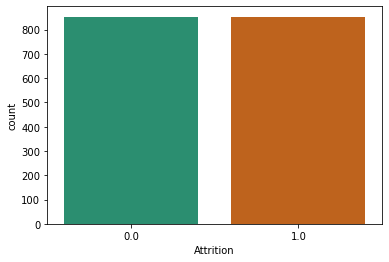

In [131]:
# Visualizing the data after oversampling
sns.countplot(y,palette="Dark2")
plt.show()

We can clearly observe the balanced data now.

## Finding best random state for building Classification Models

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.873046875  on Random_state  162


### Creating new training and testing data sets

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

## Machine Learning Model for Classification with Evaluation Metrics

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

Above are the classification algorithms and evaluation metrics that I am going to use now.

## Feature Importance

In [135]:
# Lets chkeck the feature importance using Random Forest Classifier

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFC.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

Importance
Features                            
OverTime                       0.063
JobLevel                       0.056
StockOptionLevel               0.053
JobInvolvement                 0.046
TotalWorkingYears              0.044
MonthlyIncome                  0.042
EducationField                 0.041
JobSatisfaction                0.041
YearsInCurrentRole             0.037
MaritalStatus                  0.037
YearsAtCompany                 0.036
YearsWithCurrManager           0.036
EmployeeNumber                 0.034
DistanceFromHome               0.031
NumCompaniesWorked             0.030
Age                            0.029
WorkLifeBalance                0.029
JobRole                        0.027
BusinessTravel                 0.027
TrainingTimesLastYear          0.027
Education                      0.026
DailyRate                      0.026
HourlyRate                     0.026
MonthlyRate                    0.026
RelationshipSatisfaction       0.025
PercentSalaryHike              0.025
EnvironmentSatisfaction        0.025
Department                     0.022
YearsSinceLastPromotion        0.022
Gender                         0.007
PerformanceRating              0.003
StandardHours                  0.000
EmployeeCount                  0.000
Over18                         0.000

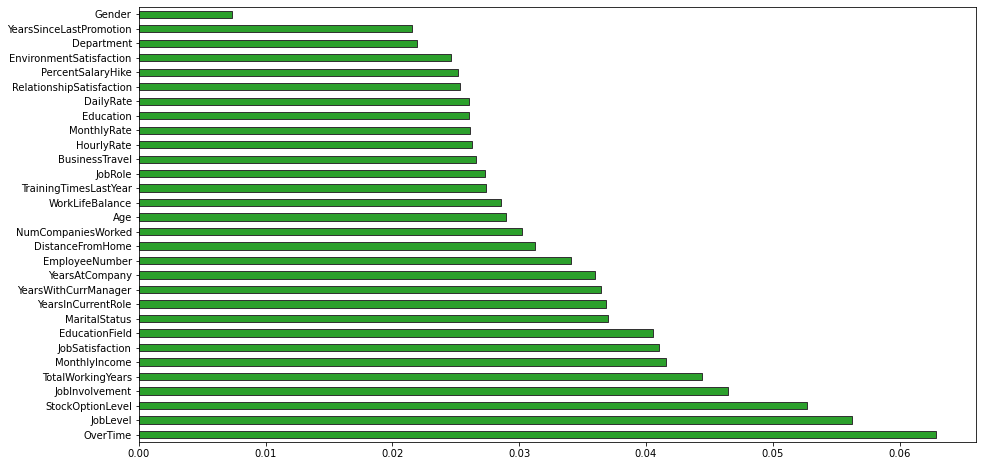

In [136]:
plt.figure(figsize=(15,8))
importances=pd.Series(RFC.feature_importances_,index=x.columns)
importances.nlargest(30).plot(kind='barh',color="tab:green",edgecolor=".2")
plt.show()

Here with the help of RandomForestClassifier we are able to list down the importance or priority given to a column as per it's involvement or weightage in predicting our label. Here we can clearly observe the features which are important for the predictions. The columns Over Time column contributing more for the predictions.

## i) Decision Tree Classifier

In [137]:
# Checking Accuracy and evaluation metrics for Decision Tree Classifier
DTC = DecisionTreeClassifier()

# Training the model
DTC.fit(x_train,y_train)

#Predicting y_test
predDTC = DTC.predict(x_test)

# Accuracy Score
DTC_score = accuracy_score(y_test, predDTC)*100
print("Accuracy Score:", DTC_score)

# ROC AUC Score
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,predDTC)*100      
print("\nroc_auc_score:", roc_auc_score)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predDTC)
print("\nConfusion Matrix:\n",conf_matrix)

# Classification Report
class_report = classification_report(y_test,predDTC)
print("\nClassification Report:\n", class_report)

# Cross Validation Score
cv_score = (cross_val_score(DTC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

# Result of accuracy minus cv scores
Result = DTC_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", Result)

Accuracy Score: 85.3515625

roc_auc_score: 85.3398947127489

Confusion Matrix:
 [[210  45]
 [ 30 227]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       255
         1.0       0.83      0.88      0.86       257

    accuracy                           0.85       512
   macro avg       0.85      0.85      0.85       512
weighted avg       0.85      0.85      0.85       512

Cross Validation Score: 85.05959424465367

Accuracy Score - Cross Validation Score is 0.2919682553463332


Created the Decision Tree Classifier model and checked for its evaluation metrics and it is giving accuracy 85%.

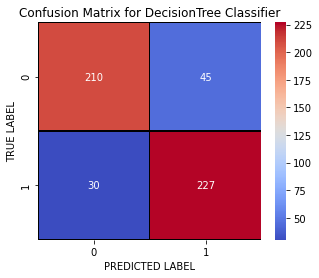

In [138]:
# Lets plot confusion matrix for DecisionTree Classifier
cm = confusion_matrix(y_test,predDTC)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black",fmt = ".0f", ax=ax, cmap="coolwarm",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for DecisionTree Classifier')
plt.show()

With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

## ii) Random Forest Classifier

In [139]:
# Checking Accuracy and evaluation metrics for Random Forest Classifier
RFC = RandomForestClassifier()

RFC.fit(x_train,y_train)                            # Training the model
predRFC = RFC.predict(x_test)                       #Predicting y_test

RFC_score = accuracy_score(y_test, predRFC)*100     # Accuracy Score 
print("Accuracy Score:", RFC_score)  

from sklearn.metrics import roc_auc_score           #ROC AUC Score
roc_auc_score2 = roc_auc_score(y_test,predRFC)*100      
print("\nroc_auc_score:", roc_auc_score2)

conf_matrix = confusion_matrix(y_test, predRFC)     # Confusion Matrix
print("\nConfusion Matrix:\n",conf_matrix)

class_report = classification_report(y_test,predRFC) # Classification Report
print("\nClassification Report:\n", class_report)

cv_score2 = (cross_val_score(RFC, x, y, cv=5).mean())*100  # Cross Validation Score
print("Cross Validation Score:", cv_score2)

# Result of accuracy minus cv scores
Result = RFC_score - cv_score2
print("\nAccuracy Score - Cross Validation Score is", Result)

Accuracy Score: 93.359375

roc_auc_score: 93.3699549858854

Confusion Matrix:
 [[245  10]
 [ 24 233]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       255
         1.0       0.96      0.91      0.93       257

    accuracy                           0.93       512
   macro avg       0.93      0.93      0.93       512
weighted avg       0.93      0.93      0.93       512

Cross Validation Score: 92.97508188849444

Accuracy Score - Cross Validation Score is 0.38429311150555634


Created RandomForestClassifier model and checked for its evaluation metrics. The model giving 93.35% accuracy.

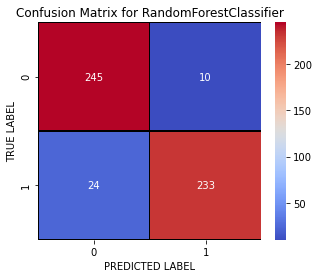

In [140]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black",fmt = ".0f", ax=ax, cmap="coolwarm",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()


With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate.

## iii) ExtraTrees Classifier

In [141]:
# Checking Accuracy and evaluation metrics for ExtraTrees Classifier
XT = ExtraTreesClassifier()

XT.fit(x_train,y_train)                            # Training the model
predXT = XT.predict(x_test)                       #Predicting y_test

XT_score = accuracy_score(y_test, predXT)*100     # Accuracy Score 
print("Accuracy Score:", XT_score)  

roc_auc_score3 = roc_auc_score(y_test,predXT)*100      # ROC AUC Score
print("\nroc_auc_score:", roc_auc_score3)

conf_matrix = confusion_matrix(y_test, predXT)     # Confusion Matrix
print("\nConfusion Matrix:\n",conf_matrix)

class_report = classification_report(y_test,predXT) # Classification Report
print("\nClassification Report:\n", class_report)

cv_score3 = (cross_val_score(XT, x, y, cv=5).mean())*100  # Cross Validation Score
print("Cross Validation Score:", cv_score3)

# Result of accuracy minus cv scores
Result = XT_score - cv_score3
print("\nAccuracy Score - Cross Validation Score is", Result)

Accuracy Score: 96.2890625

roc_auc_score: 96.28061341268025

Confusion Matrix:
 [[240  15]
 [  4 253]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       255
         1.0       0.94      0.98      0.96       257

    accuracy                           0.96       512
   macro avg       0.96      0.96      0.96       512
weighted avg       0.96      0.96      0.96       512

Cross Validation Score: 96.30790073914014

Accuracy Score - Cross Validation Score is -0.018838239140137603


Created ExtraTrees Classifier and checked for its evaluation metrics. The model giving 96.28% accuracy.

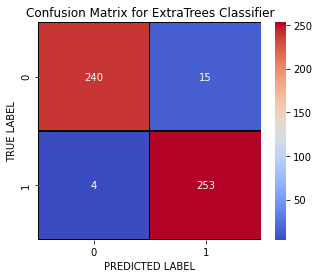

In [142]:
# Lets plot confusion matrix for ExtraTrees Classifier
cm = confusion_matrix(y_test,predXT)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black",fmt = ".0f", ax=ax, cmap="coolwarm",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for ExtraTrees Classifier')
plt.show()

## iv) GradientBoosting Classifier

In [143]:
# Checking Accuracy and evaluation metrics for GradientBoosting Classifier
GB = GradientBoostingClassifier()

GB.fit(x_train,y_train)                            # Training the model
predGB = GB.predict(x_test)                       #Predicting y_test

GB_score = accuracy_score(y_test, predGB)*100     # Accuracy Score 
print("Accuracy Score:", GB_score)  

roc_auc_score4 = roc_auc_score(y_test,predGB)*100      # ROC AUC Score
print("\nroc_auc_score:", roc_auc_score4)

conf_matrix = confusion_matrix(y_test, predGB)     # Confusion Matrix
print("\nConfusion Matrix:\n",conf_matrix)

class_report = classification_report(y_test,predGB) # Classification Report
print("\nClassification Report:\n", class_report)

cv_score4 = (cross_val_score(GB, x, y, cv=5).mean())*100  # Cross Validation Score
print("Cross Validation Score:", cv_score4)

# Result of accuracy minus cv scores
Result = GB_score - cv_score4
print("\nAccuracy Score - Cross Validation Score is", Result)

Accuracy Score: 92.96875

roc_auc_score: 92.97474631876096

Confusion Matrix:
 [[241  14]
 [ 22 235]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       255
         1.0       0.94      0.91      0.93       257

    accuracy                           0.93       512
   macro avg       0.93      0.93      0.93       512
weighted avg       0.93      0.93      0.93       512

Cross Validation Score: 88.35314091680814

Accuracy Score - Cross Validation Score is 4.615609083191856


Created GradientBoosting Classifier and checked for its evaluation metrics. The model giving 93% accuracy.

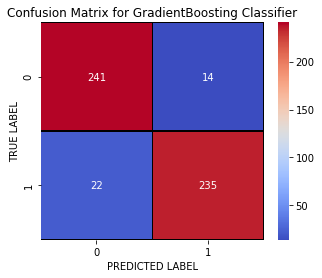

In [144]:
# Lets plot confusion matrix for GradientBoosting Classifier
cm = confusion_matrix(y_test,predGB)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black",fmt = ".0f", ax=ax, cmap="coolwarm",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for GradientBoosting Classifier')
plt.show()

## v) Extreme Gradient Boosting Classifier (XGB Classifier)

In [145]:
# Checking Accuracy and evaluation metrics for XGB Classifier
XGB = xgb(verbosity=0)

XGB.fit(x_train,y_train)                            # Training the model
predXGB = XGB.predict(x_test)                       #Predicting y_test

XGB_score = accuracy_score(y_test, predXGB)*100     # Accuracy Score 
print("Accuracy Score:", XGB_score)  

roc_auc_score5 = roc_auc_score(y_test,predXGB)*100      # ROC AUC Score
print("\nroc_auc_score:", roc_auc_score5)

conf_matrix = confusion_matrix(y_test, predXGB)     # Confusion Matrix
print("\nConfusion Matrix:\n",conf_matrix)
class_report = classification_report(y_test,predXGB) # Classification Report
print("\nClassification Report:\n", class_report)

cv_score5 = (cross_val_score(XGB, x, y, cv=5).mean())*100  # Cross Validation Score
print("Cross Validation Score:", cv_score5)

# Result of accuracy minus cv scores
Result = XGB_score - cv_score5
print("\nAccuracy Score - Cross Validation Score is", Result)

Accuracy Score: 92.578125

roc_auc_score: 92.5810635538262

Confusion Matrix:
 [[238  17]
 [ 21 236]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       255
         1.0       0.93      0.92      0.93       257

    accuracy                           0.93       512
   macro avg       0.93      0.93      0.93       512
weighted avg       0.93      0.93      0.93       512

Cross Validation Score: 88.763012124642

Accuracy Score - Cross Validation Score is 3.815112875357997


Created GradientBoosting Classifier and checked for its evaluation metrics. The model giving 92.57% accuracy.

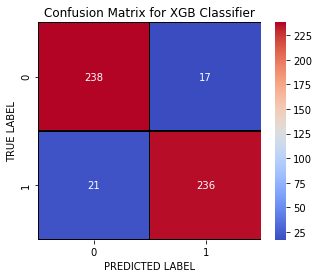

In [146]:
# Lets plot confusion matrix for XGB Classifier
cm = confusion_matrix(y_test,predXGB)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black",fmt = ".0f", ax=ax, cmap="coolwarm",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGB Classifier')
plt.show()

## vi) Bagging Classifier

In [147]:
# Checking Accuracy and evaluation metrics for Bagging Classifier
BC = BaggingClassifier()

BC.fit(x_train,y_train)                            # Training the model
predBC = BC.predict(x_test)                       #Predicting y_test

BC_score = accuracy_score(y_test, predBC)*100     # Accuracy Score 
print("Accuracy Score:", BC_score)  

roc_auc_score6 = roc_auc_score(y_test,predBC)*100      # ROC AUC Score
print("\nroc_auc_score:", roc_auc_score6)

conf_matrix = confusion_matrix(y_test, predBC)     # Confusion Matrix
print("\nConfusion Matrix:\n",conf_matrix)

class_report = classification_report(y_test,predBC) # Classification Report
print("\nClassification Report:\n", class_report)

cv_score6 = (cross_val_score(BC, x, y, cv=5).mean())*100  # Cross Validation Score
print("Cross Validation Score:", cv_score6)

# Result of accuracy minus cv scores
Result = BC_score - cv_score6
print("\nAccuracy Score - Cross Validation Score is", Result)

Accuracy Score: 90.0390625

roc_auc_score: 90.0396734569314

Confusion Matrix:
 [[230  25]
 [ 26 231]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       255
         1.0       0.90      0.90      0.90       257

    accuracy                           0.90       512
   macro avg       0.90      0.90      0.90       512
weighted avg       0.90      0.90      0.90       512

Cross Validation Score: 88.75683833239012

Accuracy Score - Cross Validation Score is 1.2822241676098827


Created GradientBoosting Classifier and checked for its evaluation metrics. The model giving 90% accuracy.

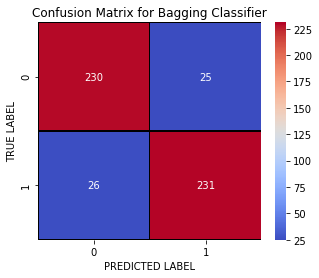

In [148]:
# Lets plot confusion matrix for Bagging Classifier
cm = confusion_matrix(y_test,predBC)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black",fmt = ".0f", ax=ax, cmap="coolwarm",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()


## Plotting ROC and compare AUC for all the models used

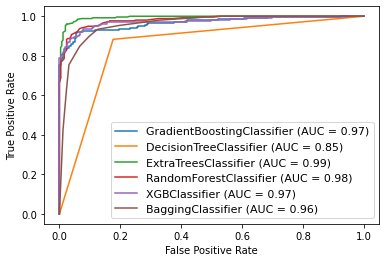

In [149]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(GB,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XT, x_test, y_test, ax=disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

In [186]:
from sklearn.model_selection import GridSearchCV

# RandomForestClassifier
param_grid = {"n_estimators" : [int(x) for x in np.linspace(start = 10,stop = 80,num = 10)],
              "max_features" : ["auto","sqrt"],
              "max_depth" : [2,4],
              "min_samples_split" : [2,5],
              "min_samples_leaf" : [1,2],
              "bootstrap" : [True,False]}


In [187]:
RFC_Model = RandomForestClassifier()

In [190]:
RFC_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=10,verbose=2,n_jobs=4)

In [191]:
RFC_grid.fit(x_train,y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 276 tasks      | elapsed:    9.0s
[Parallel(n_jobs=4)]: Done 682 tasks      | elapsed:   19.2s
[Parallel(n_jobs=4)]: Done 1248 tasks      | elapsed:   36.8s
[Parallel(n_jobs=4)]: Done 1978 tasks      | elapsed:   58.4s
[Parallel(n_jobs=4)]: Done 2868 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 3200 out of 3200 | elapsed:  1.6min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [192]:
RFC_grid.best_estimator_

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=33)

In [193]:
RFC_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 33}

In [194]:
RFC_grid.best_score_

0.8735434173669467

In [195]:
# Creating final model 
MicroCredit_model = GradientBoostingClassifier(min_samples_leaf = 2, min_samples_split = 5, max_features = "auto", max_depth = 4,n_estimators = 80)
MicroCredit_model.fit(x_train, y_train)
pred = MicroCredit_model.predict(x_test)
acc_score = accuracy_score(y_test,pred)
print("Accuracy score for the Best Model is:", acc_score*100)

Accuracy score for the Best Model is: 91.6015625


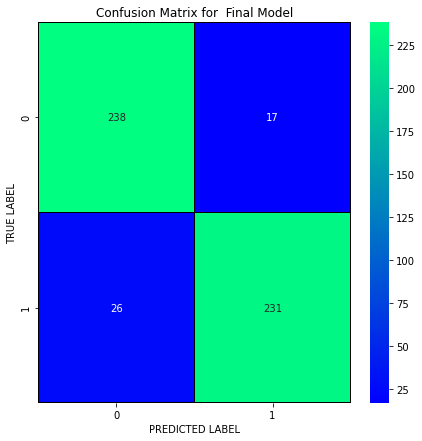

In [196]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="winter",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

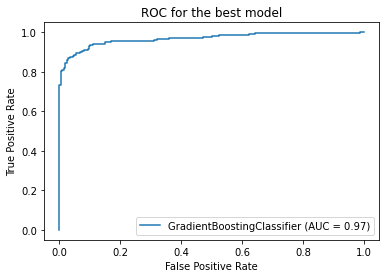

In [197]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(MicroCredit_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

In [174]:
# Saving the model using .pkl
import joblib
joblib.dump(MicroCredit_model,"Micro_Credit_Loan_Defaulter(IP3).pkl")

['Micro_Credit_Loan_Defaulter(IP3).pkl']

In [175]:
# Loading the saved model
model=joblib.load("Micro_Credit_Loan_Defaulter(IP3).pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0.

In [176]:
# Creating dataframe for predicted results
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0    1    2    3    4    5    6    7    8    9    ...  502  503  \
Predicted  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  ...  1.0  1.0   
Original   1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  ...  1.0  1.0   

           504  505  506  507  508  509  510  511  
Predicted  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  
Original   1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  

[2 rows x 512 columns]